# Exploratory Data Analysis (EDA) of Cleaned BRFSS Data
This notebook performs EDA on the cleaned BRFSS dataset to:
1. Analyze relationships between variables
2. Generate data visualizations
3. Select a subset of variables for modeling, based on the problem statement and data background

In [466]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Set plot style
sns.set(style="whitegrid")

In [467]:
# # Load the cleaned dataset
df = pd.read_pickle('../data/processed/clean_data.pkl')
df.head()

_STATE      IDATE  IMONTH DISPCODE GENHLTH  PHYSHLTH  MENTHLTH HLTHPLN1  \
0     1.0 2015-01-29     1.0     1200       5        15        18        1   
1     1.0 2015-01-20     1.0     1100       3         0         0        2   
3     1.0 2015-01-14     1.0     1100       5        30        30        1   
4     1.0 2015-01-14     1.0     1100       5        20         0        1   
5     1.0 2015-01-14     1.0     1100       2         0         0        1   

  PERSDOC2 MEDCOST  ... _EDUCAG _INCOMG _SMOKER3 _RFSMOK3 DRNKANY5  \
0        1       2  ...       2       2        3      1.0        2   
1        1       1  ...       4       1        1      2.0        2   
3        2       1  ...       2       5        4      1.0        2   
4        1       2  ...       3       9        4      1.0        2   
5        1       2  ...       1       4        4      1.0        2   

       DROCDY3_ _RFBING5 _TOTINDA _RFSEAT3  YEAR  
0  5.397605e-79      1.0        2        1  2015  
1  5.397605e-79      1.0        1        2  2015  
3  5.397605e-79      1.0        2        1  2015  
4  5.397605e-79      1.0        2        1  2015  
5  5.397605e-79      1.0        1        1  2015  

[5 rows x 57 columns]

## 1. Data Overview and Summary Statistics (Data Profiles - Plots and Summaries)
- Check shape, data types, and missing values
- Display summary statistics for numerical and categorical variables

In [468]:
# Data shape and info
print(f"Data shape: {df.shape}")
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(10)

Data shape: (2191972, 57)
<class 'pandas.core.frame.DataFrame'>
Index: 2191972 entries, 0 to 2380046
Data columns (total 57 columns):
 #   Column    Dtype         
---  ------    -----         
 0   _STATE    float64       
 1   IDATE     datetime64[ns]
 2   IMONTH    float64       
 3   DISPCODE  category      
 4   GENHLTH   category      
 5   PHYSHLTH  Int64         
 6   MENTHLTH  Int64         
 7   HLTHPLN1  category      
 8   PERSDOC2  category      
 9   MEDCOST   category      
 10  CHECKUP1  category      
 11  CVDINFR4  category      
 12  CVDCRHD4  category      
 13  CVDSTRK3  category      
 14  ASTHMA3   category      
 15  CHCSCNCR  category      
 16  CHCOCNCR  category      
 17  CHCCOPD1  category      
 18  HAVARTH3  category      
 19  ADDEPEV2  category      
 20  CHCKIDNY  float64       
 21  DIABETE3  category      
 22  SEX       category      
 23  MARITAL   category      
 24  RENTHOM1  category      
 25  VETERAN3  category      
 26  CHILDREN  Int64      

_STATE      0
QLACTLM2    0
SMOKE100    0
USENOW3     0
EXERANY2    0
PNEUVAC3    0
HIVTST6     0
QSTVER      0
_RFHLTH     0
_HCVU651    0
dtype: int64

We have no missing values

In [469]:
# Summary statistics for numerical variables
df.describe().T

count                           mean                  min  \
_STATE    2191972.0                      29.817623                  1.0   
IDATE       2191972  2013-06-05 05:24:01.312572416  2011-01-02 00:00:00   
IMONTH    2191972.0                        6.49137                  1.0   
PHYSHLTH  2191972.0                       4.280551                  0.0   
MENTHLTH  2191972.0                       3.382993                  0.0   
CHCKIDNY  2191972.0                       1.982117                  1.0   
CHILDREN  2191972.0                       0.521679                  0.0   
WEIGHT2   2191972.0                     104.164198                  0.0   
HEIGHT3   2191972.0                         1.7345                 0.01   
SMOKE100  2191972.0                       1.581689                  1.0   
USENOW3   2191972.0                       2.964498                  1.0   
_RFSMOK3  2191972.0                       1.204005                  1.0   
DROCDY3_  2191972.0                       37.45637                  0.0   
_RFBING5  2191972.0                       1.375577                  1.0   

                          25%                  50%                  75%  \
_STATE                   19.0                 29.0                 42.0   
IDATE     2012-03-01 00:00:00  2013-05-24 00:00:00  2014-08-21 00:00:00   
IMONTH                    3.0                  6.0                  9.0   
PHYSHLTH                  0.0                  0.0                  3.0   
MENTHLTH                  0.0                  0.0                  2.0   
CHCKIDNY                  2.0                  2.0                  2.0   
CHILDREN                  0.0                  0.0                  1.0   
WEIGHT2                65.772              78.0192                90.72   
HEIGHT3                1.6256               1.6764                1.778   
SMOKE100                  1.0                  2.0                  2.0   
USENOW3                   3.0                  3.0                  3.0   
_RFSMOK3                  1.0                  1.0                  1.0   
DROCDY3_                  0.0                  3.0                 20.0   
_RFBING5                  1.0                  1.0                  1.0   

                          max         std  
_STATE                   72.0   15.734976  
IDATE     2016-03-08 00:00:00         NaN  
IMONTH                   12.0    3.413643  
PHYSHLTH                 30.0     8.78881  
MENTHLTH                 30.0    7.688633  
CHCKIDNY                  9.0    0.333462  
CHILDREN                 87.0    1.044641  
WEIGHT2                 999.0  148.326307  
HEIGHT3                  9.99    0.590027  
SMOKE100                  9.0    0.666813  
USENOW3                   9.0    0.402196  
_RFSMOK3                  9.0    0.699534  
DROCDY3_                900.0   137.47343  
_RFBING5                  9.0    1.413011

In [470]:
#Columns CHCKIDNY, SMOKE100, USENOW3, _RFSMOK3, DROCDY3_ and _RFBING5 are categorical variables,
#lets convert them to categorical type
categorical_columns = ['CHCKIDNY', 'SMOKE100', 'USENOW3', '_RFSMOK3', 'DROCDY3_', '_RFBING5']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [471]:
# Summary statistics for numerical variables
df.describe().T

count                           mean                  min  \
_STATE    2191972.0                      29.817623                  1.0   
IDATE       2191972  2013-06-05 05:24:01.312572416  2011-01-02 00:00:00   
IMONTH    2191972.0                        6.49137                  1.0   
PHYSHLTH  2191972.0                       4.280551                  0.0   
MENTHLTH  2191972.0                       3.382993                  0.0   
CHILDREN  2191972.0                       0.521679                  0.0   
WEIGHT2   2191972.0                     104.164198                  0.0   
HEIGHT3   2191972.0                         1.7345                 0.01   

                          25%                  50%                  75%  \
_STATE                   19.0                 29.0                 42.0   
IDATE     2012-03-01 00:00:00  2013-05-24 00:00:00  2014-08-21 00:00:00   
IMONTH                    3.0                  6.0                  9.0   
PHYSHLTH                  0.0                  0.0                  3.0   
MENTHLTH                  0.0                  0.0                  2.0   
CHILDREN                  0.0                  0.0                  1.0   
WEIGHT2                65.772              78.0192                90.72   
HEIGHT3                1.6256               1.6764                1.778   

                          max         std  
_STATE                   72.0   15.734976  
IDATE     2016-03-08 00:00:00         NaN  
IMONTH                   12.0    3.413643  
PHYSHLTH                 30.0     8.78881  
MENTHLTH                 30.0    7.688633  
CHILDREN                 87.0    1.044641  
WEIGHT2                 999.0  148.326307  
HEIGHT3                  9.99    0.590027

### Bird's eye view of categorical variable

In [472]:
# Summary statistics for categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(dropna=False).head(10))


DISPCODE value counts:
DISPCODE
1100    2010900
1200     181072
Name: count, dtype: int64

GENHLTH value counts:
GENHLTH
2    726226
3    667632
1    392852
4    283182
5    116747
7      2905
9      2428
Name: count, dtype: int64

HLTHPLN1 value counts:
HLTHPLN1
1    1973520
2     212009
7       3821
9       2622
Name: count, dtype: int64

PERSDOC2 value counts:
PERSDOC2
1    1687606
3     322344
2     175639
7       4400
9       1983
Name: count, dtype: int64

MEDCOST value counts:
MEDCOST
2    1938472
1     249283
7       3414
9        803
Name: count, dtype: int64

CHECKUP1 value counts:
CHECKUP1
1    1591824
2     258212
3     151532
4     147309
7      22198
8      19070
9       1827
Name: count, dtype: int64

CVDINFR4 value counts:
CVDINFR4
2    2054912
1     127951
7       8421
9        688
Name: count, dtype: int64

CVDCRHD4 value counts:
CVDCRHD4
2    2044850
1     130181
7      16179
9        762
Name: count, dtype: int64

CVDSTRK3 value counts:
CVDSTRK3
2    2099635
1     

#### Bird's eye view of numerical columns

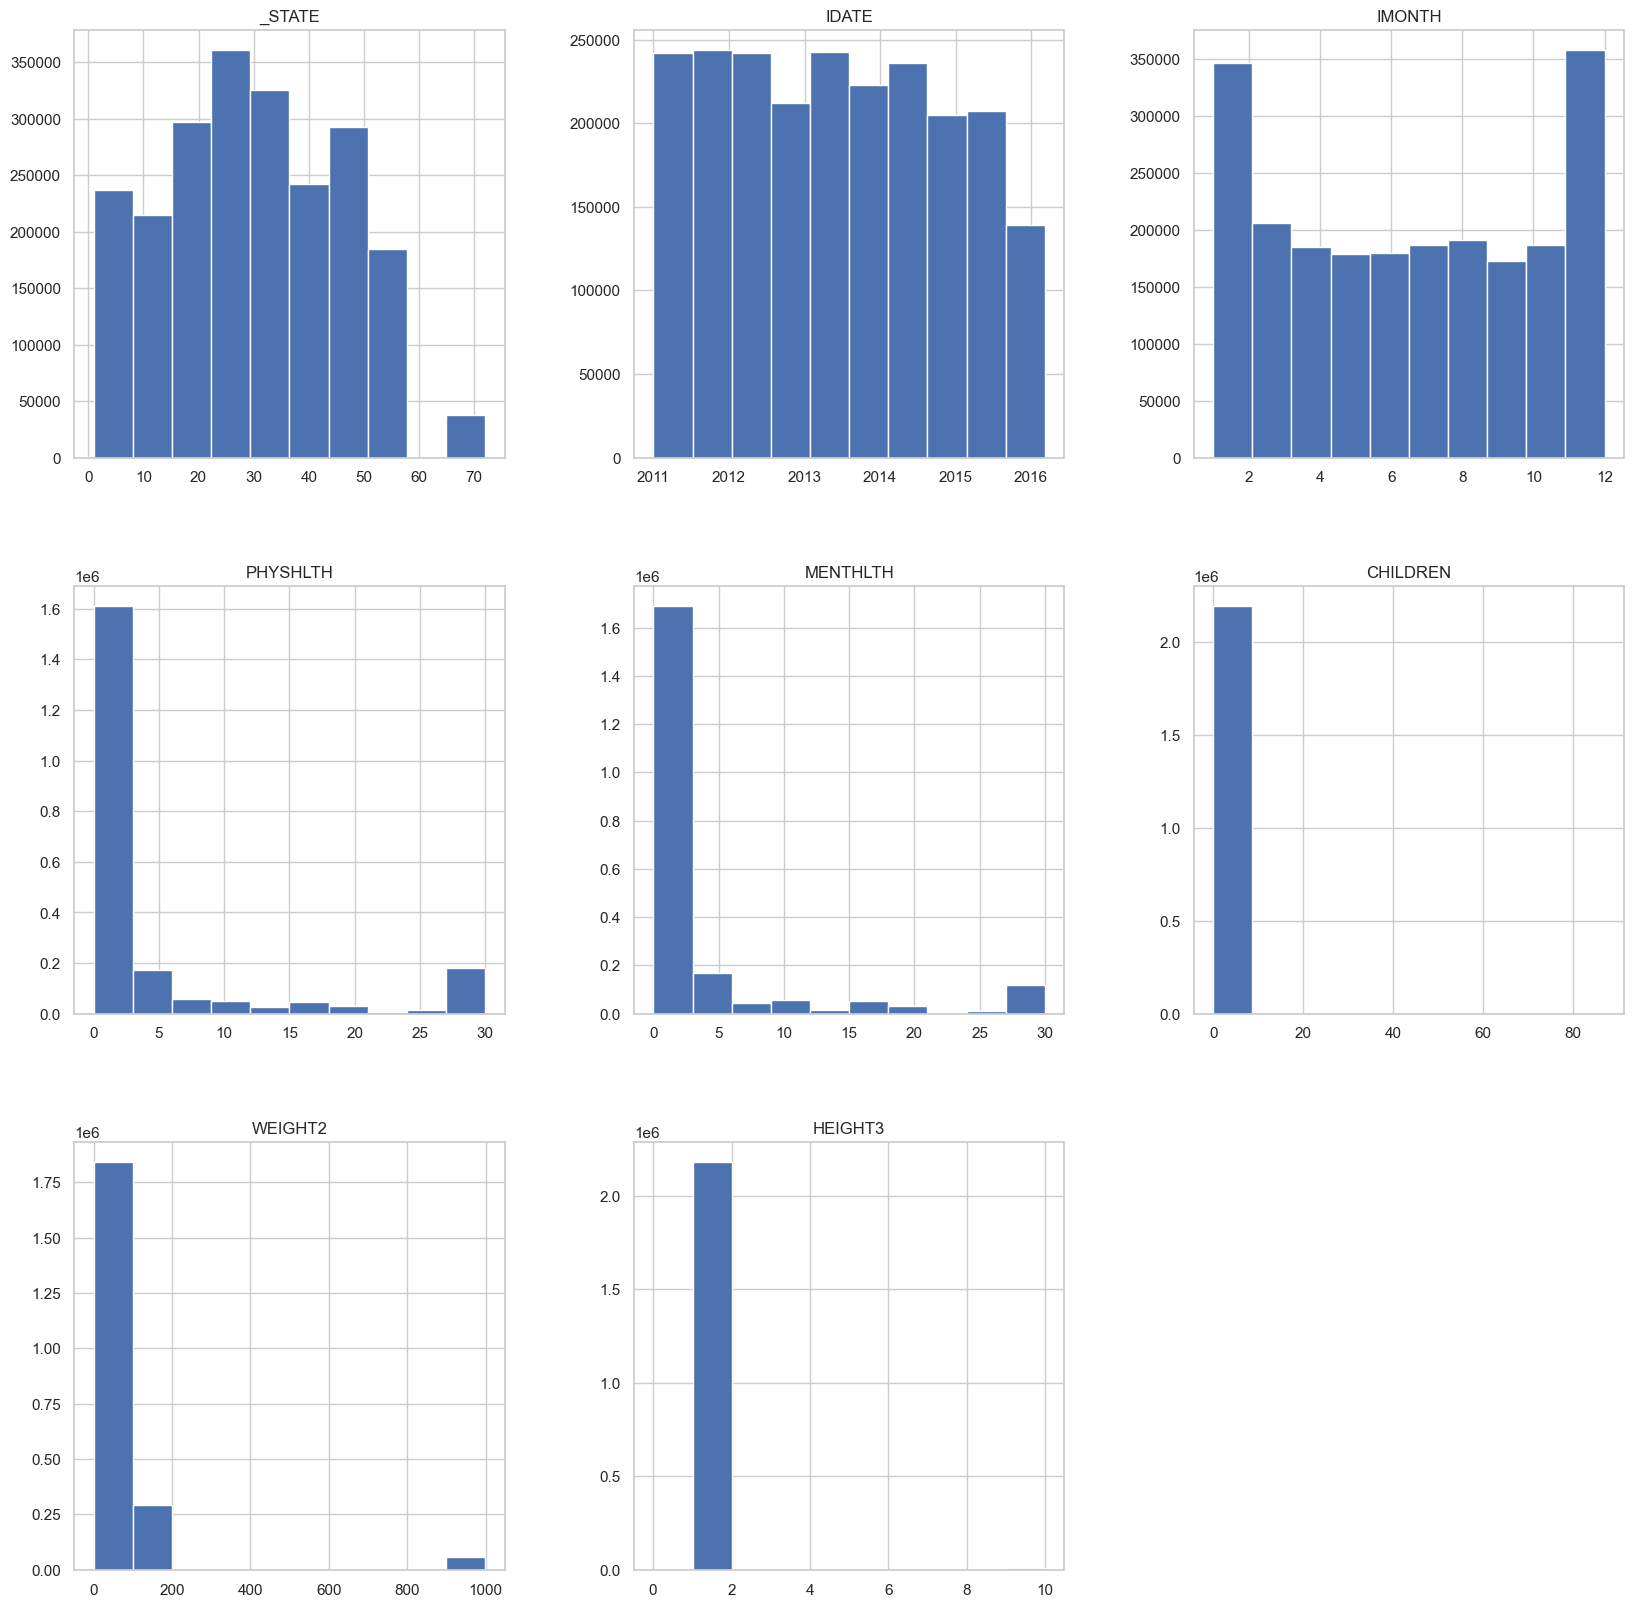

In [473]:
#Let's check the distribution of each variable in the dataframe
hist = df.hist(bins=10,figsize =(20, 20))

plt.show()

### Handling issues in Numerical Columns

We notice some outliers in WEIGHT2 variable, but lets confirm using a box plot

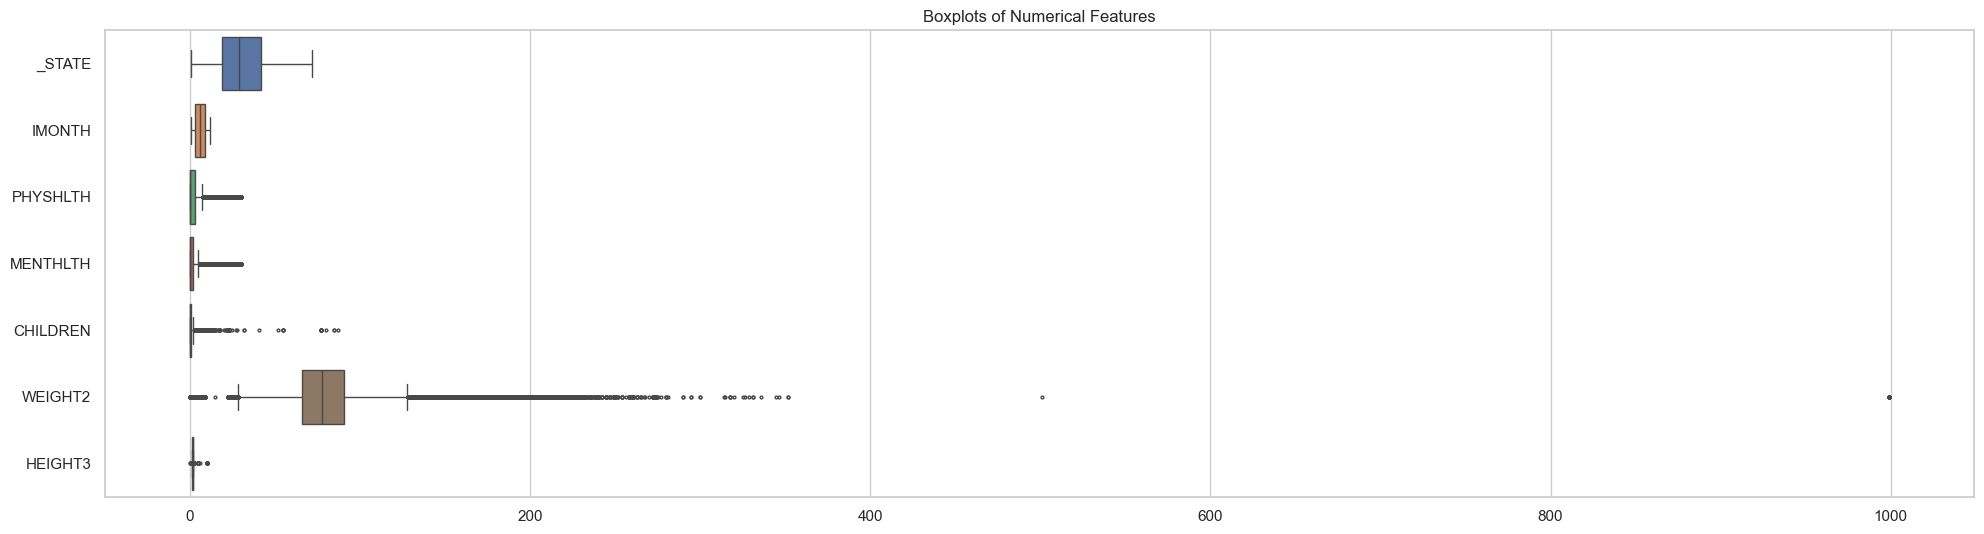

In [474]:
# Check for outliers using boxplots
# Create a boxplot for every numerical column in df, with improved figure size for clarity
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(np.number).columns
plt.figure(figsize=(20, len(numeric_cols)*0.5 + 2))  # Dynamic height for clarity
sns.boxplot(data=df[numeric_cols], orient='h', fliersize=2, linewidth=1)
plt.title('Boxplots of Numerical Features')
plt.tight_layout()
plt.show()

We notice that  `CHILDREN` and `WEIGHT2`  have some outliers, let's investigate if they are problematic in our analysis, and decide what to do with it

##### 1. Evaluating CHILDREN variable

In [475]:
# Find outliers in the 'CHILDREN' column using the IQR method
Q1 = df['CHILDREN'].quantile(0.25)
Q3 = df['CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get rows where 'CHILDREN' is an outlier
outlier_rows = df[((df['DISPCODE'] == 1200) & (df['CHILDREN'] < lower_bound) | (df['CHILDREN'] > upper_bound))]['CHILDREN']

print(f"Children {len(outlier_rows)} outliers found between {lower_bound} and {upper_bound}.")
# Display the outlier rows

Children 135940 outliers found between -1.5 and 2.5.


This is an impossible range since CHILDREN can only by >= 0, so let's investigate a litte more

In [476]:
#xonly investigate values that are impossible or implausible, e.g.
df['CHILDREN'].describe()

count    2191972.0
mean      0.521679
std       1.044641
min            0.0
25%            0.0
50%            0.0
75%            1.0
max           87.0
Name: CHILDREN, dtype: Float64

Text(0.5, 1.0, 'Distribution of Number of Children')

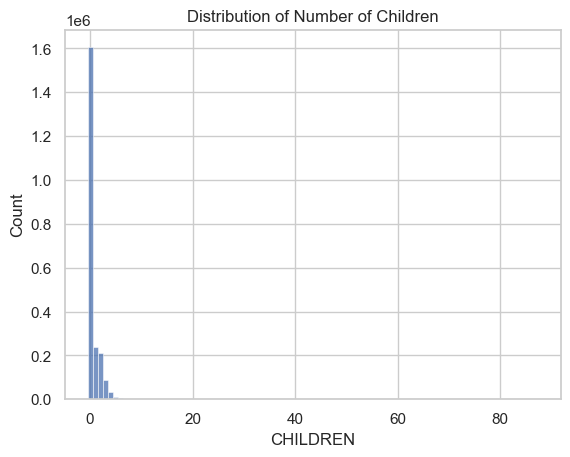

In [477]:
#use count friendly visualization
sns.histplot(df['CHILDREN'], bins=range(0, df['CHILDREN'].max()+1), discrete=True)
plt.title("Distribution of Number of Children")

In [478]:
df['CHILDREN'].value_counts().sort_index()

CHILDREN
0     1605060
1      238512
2      212460
3       89759
4       31003
5        9629
6        3459
7        1137
8         520
9         182
10         98
11         38
12         31
13         18
14         12
15          7
16          1
17          5
18          2
20          1
21          1
22          5
23          9
24          1
25          1
27          1
28          1
32          2
41          1
52          1
55          4
77          7
80          1
85          2
87          1
Name: count, dtype: Int64

We notice that there is a very small value of households that have children >=5, so lets clip it 

In [479]:
df['CHILDREN'] = df['CHILDREN'].clip(upper=5)  # Group 5+ children

In [480]:
df['CHILDREN'].value_counts().sort_index()

CHILDREN
0    1605060
1     238512
2     212460
3      89759
4      31003
5      15178
Name: count, dtype: Int64

#### 2. Evaluating WEIGHT2 variable

In [481]:
#perform outlier analysis of rows on variable WEIGHT2, and display and show how to handle them
weight2 = df['WEIGHT2']
lower_bound = weight2.quantile(0.01)
upper_bound = weight2.quantile(0.99)
outliers_weight = df[(weight2 < lower_bound) | (weight2 > upper_bound)]
print(f"Number of outliers in WEIGHT2: {outliers_weight.shape[0]} with lower bound {lower_bound} and upper bound {upper_bound}")


Number of outliers in WEIGHT2: 21111 with lower bound 46.2672 and upper bound 999.0


In [482]:
# Find rows in the dataframe where WEIGHT2 > 800
heavy_rows = df[df['WEIGHT2'] > 800]
print(f"Number of rows with WEIGHT2 > 800: {heavy_rows.shape[0]}")
heavy_rows['WEIGHT2'].unique()

Number of rows with WEIGHT2 > 800: 57521


array([999.])

Seems like 999 weight refers to a value for people who refused to share their weights. Let's check the proportion of rows that have this missing value

In [483]:
len(heavy_rows)/len(df)

0.026241667320567964

Let's check if these outliers are _AGE_G dependent, before choosing to discard them

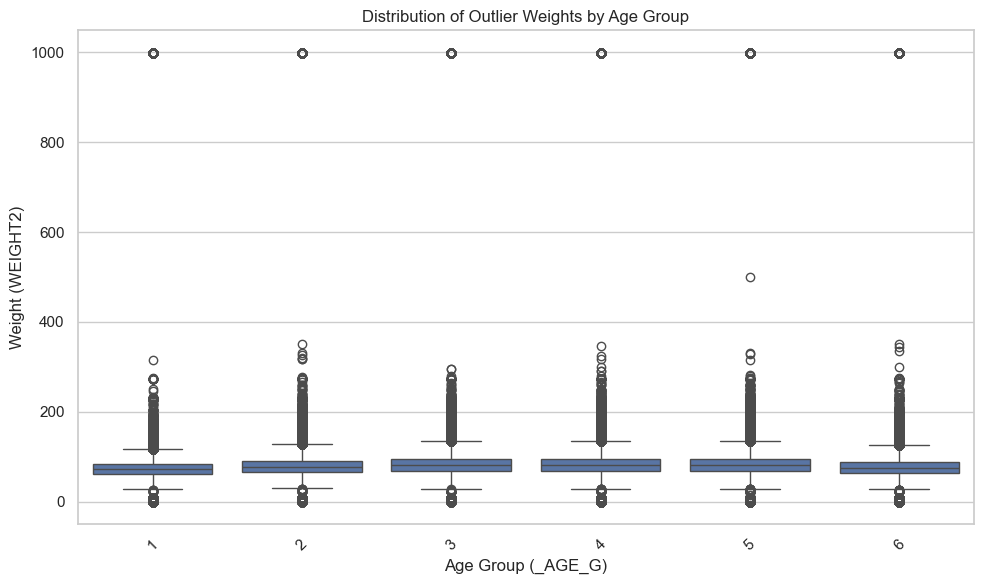

In [484]:
#
if 'WEIGHT2' in df.columns and '_AGE_G' in outliers_weight.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='_AGE_G', y='WEIGHT2', data=df)
    plt.title('Distribution of Outlier Weights by Age Group')
    plt.xlabel('Age Group (_AGE_G)')
    plt.ylabel('Weight (WEIGHT2)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found in outliers dataframe.")

Looks like we can discard these rows as they seem like a data processing error in the column


In [485]:
df = df.drop(heavy_rows.index)

In [486]:
#Let's check the shape of the dataframe after removing outliers
print("Shape of the dataframe after removing outliers:", df.shape)
df.shape

Shape of the dataframe after removing outliers: (2134451, 57)


(2134451, 57)

One good thing to check data integrity is to make sure that the BMI column corresponds to the HEIGHT( in meters) and WEIGHT (in kg) columns

In [487]:
# Compute BMI_CALC and assign categories as specified
df['BMI_CALC'] = df['WEIGHT2'] / (df['HEIGHT3'] ** 2)
df['BMI_CALC_CAT'] = np.where(df['BMI_CALC'] <= 25, 1,
                   np.where((df['BMI_CALC'] < 99), 2, 9))

bmi_categories = pd.CategoricalDtype(categories=[1, 2, 9], ordered=False)
df['BMI_CALC_CAT'] = df['BMI_CALC_CAT'].astype(bmi_categories)

In [488]:
df['BMI_CALC_CAT'].unique(), df['_RFBMI5'].unique()

([2, 1, 9]
 Categories (3, int64): [1, 2, 9],
 [2, 1, 9]
 Categories (3, int64): [1, 2, 9])

In [489]:
# Filter rows where BMI_CALC does NOT match _RFBMI5 into a new temporary variable
mismatch = df[df['BMI_CALC_CAT'].astype(str) != df['_RFBMI5'].astype(str)]
print(f"Number of mismatched rows: {mismatch.shape[0]}")
mismatch[['BMI_CALC_CAT', '_RFBMI5']].head()


Number of mismatched rows: 17092


BMI_CALC_CAT _RFBMI5
15              1       2
1255            1       9
1348            1       2
2333            2       9
2433            1       2

In [490]:
proportion_mismatch = mismatch.shape[0] / df.shape[0]
print(f"Proportion of mismatched rows: {proportion_mismatch}")

Proportion of mismatched rows: 0.008007679726543265


In [491]:
# Lets also see proportion of rows whose BMI_CALC_CAT is 9
proportion_bmi_9 = df[df['BMI_CALC_CAT'] == 9].shape[0] / df.shape[0]
print(f"Proportion of rows with BMI_CALC_CAT = 9: {proportion_bmi_9}")

Proportion of rows with BMI_CALC_CAT = 9: 4.075989563592699e-05


In [492]:
#This is very low, so lets drop the rows where BMI_CALC does NOT match _RFBMI5
df = df[(df['BMI_CALC_CAT'].astype(str) == df['_RFBMI5'].astype(str)) & (df['BMI_CALC_CAT'] != 9)]

In [493]:
pd.crosstab([df['SEX']], [df['_RFBMI5'], df['BMI_CALC_CAT']], normalize='index').style.background_gradient(cmap='Blues')

In [494]:
print(df['_RFBMI5'].value_counts())

#Lets drop the empty category 9 from the BMI_CALC_CAT column
# Now drop unused ones
df['BMI_CALC_CAT'] = df['BMI_CALC_CAT'].cat.remove_unused_categories()
print(df['BMI_CALC_CAT'].value_counts())


_RFBMI5
2    1377000
1     740275
9          0
Name: count, dtype: int64
BMI_CALC_CAT
2    1377000
1     740275
Name: count, dtype: int64


In [495]:
# Drop the BMI_CALC and BMI_CALC_CAT columns as they are not needed anymore
df.drop(columns=['BMI_CALC', 'BMI_CALC_CAT'], inplace=True)

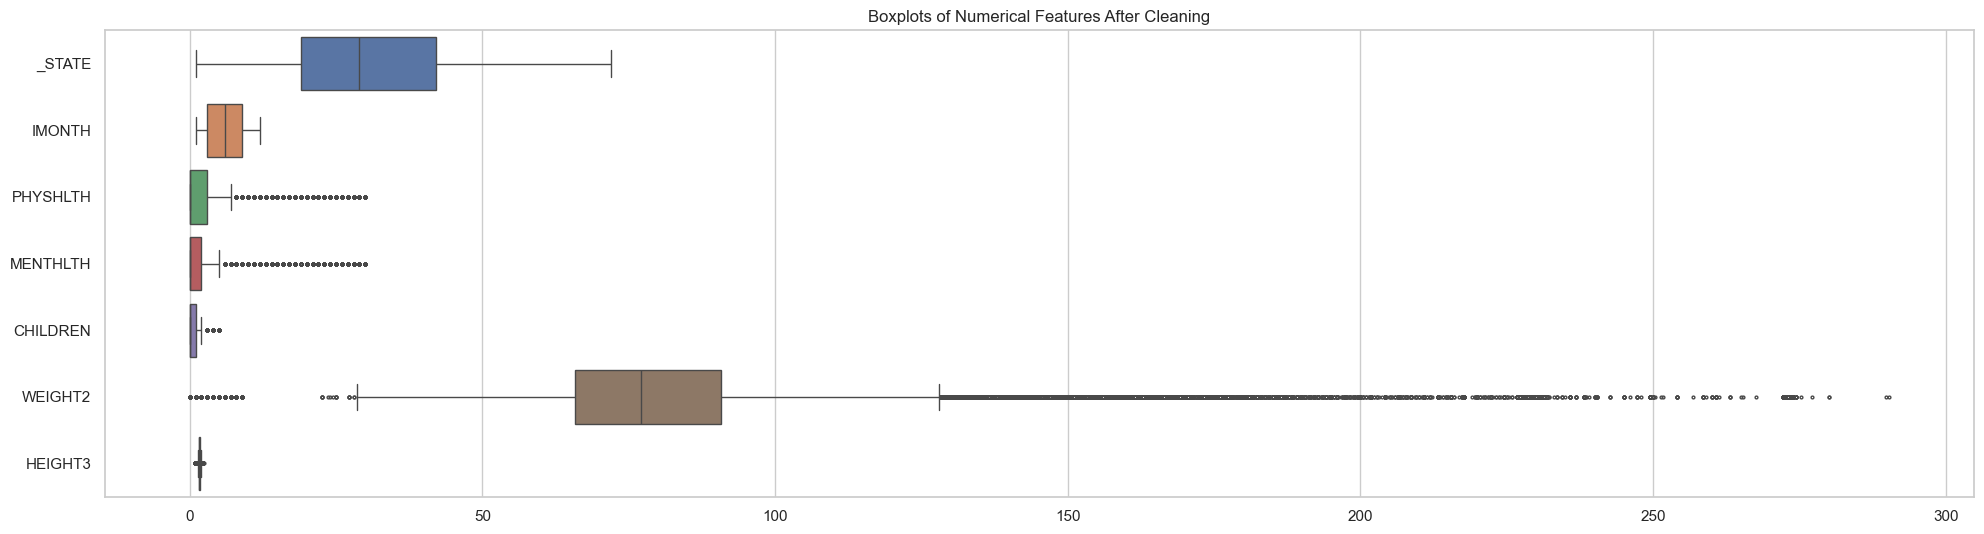

In [496]:
# Plot the boxplots for all the numeric columns once more to check for outliers
plt.figure(figsize=(20, len(numeric_cols)*0.5 + 2))  # Dynamic height for clarity
sns.boxplot(data=df[numeric_cols], orient='h', fliersize=2, linewidth=1)
plt.title('Boxplots of Numerical Features After Cleaning')
plt.tight_layout()
plt.show()

### Let's evaluate an appropriate Explanatory variable for our analysis



1. Perform some EDA on Y variable i.e choose which one could be the best Y variable out of SMOKE100, USENOW3, _SMOKER3, _RFSMOK3 

In [497]:
# 1. EDA on Y variable: Compare SMOKE100, USENOW3, _SMOKER3, _RFSMOK3

# Evaluate smoking-related variables: SMOKE100, USENOW3, _SMOKER3, _RFSMOK3
smoking_vars = [col for col in ['SMOKE100', 'USENOW3', '_SMOKER3', '_RFSMOK3'] if col in df.columns]

# Show value counts and missingness for each candidate Y variable
for col in smoking_vars:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(dropna=False))
    print(f"Missing values: {df[col].isnull().sum()}")

# Show summary table for easier comparison
print("\nSummary of candidate Y variables:")
#print the number of unique classes for each variable, without value counts
summary_table = pd.DataFrame({
    'Variable': smoking_vars,
    'Unique Classes': [df[col].nunique() for col in smoking_vars],
    'Missing Values': [df[col].isnull().sum() for col in smoking_vars]
})
print(summary_table)


SMOKE100 value counts:
SMOKE100
2.0    1152026
1.0     954963
7.0       7585
9.0       2701
Name: count, dtype: int64
Missing values: 0

USENOW3 value counts:
USENOW3
3.0    2045146
1.0      38330
2.0      29585
9.0       3662
7.0        552
Name: count, dtype: int64
Missing values: 0

_SMOKER3 value counts:
_SMOKER3
4    1152026
3     616272
1     243264
2      94328
9      11385
Name: count, dtype: int64
Missing values: 0

_RFSMOK3 value counts:
_RFSMOK3
1.0    1768298
2.0     337592
9.0      11385
Name: count, dtype: int64
Missing values: 0

Summary of candidate Y variables:
   Variable  Unique Classes  Missing Values
0  SMOKE100               4               0
1   USENOW3               5               0
2  _SMOKER3               5               0
3  _RFSMOK3               3               0


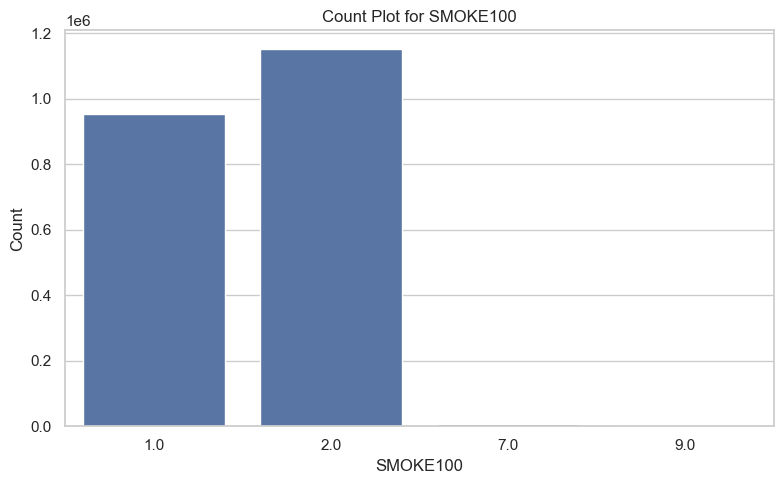

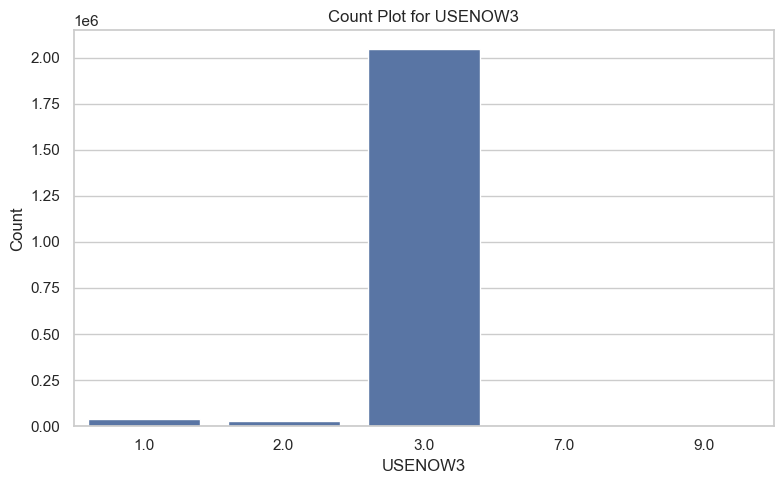

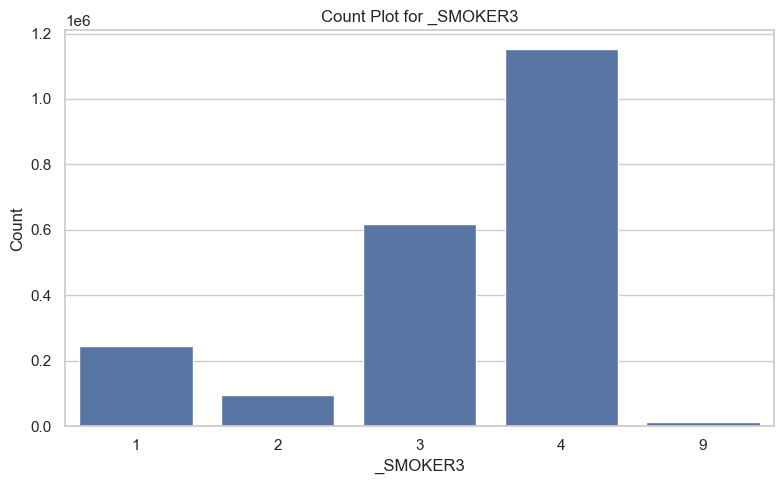

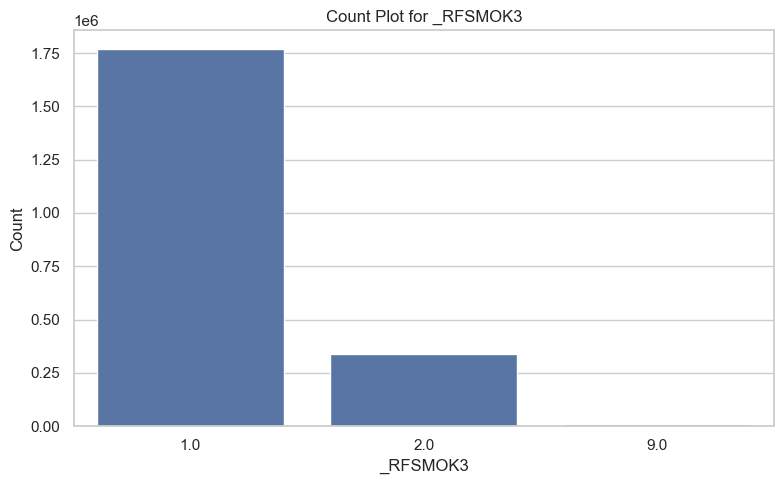

In [498]:
from statsmodels.graphics.mosaicplot import mosaic

# Generate count plots for each smoking variable with improved figure size
for col in ['SMOKE100', 'USENOW3', '_SMOKER3', '_RFSMOK3']:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, data=df, order=sorted(df[col].dropna().unique()))
        plt.title(f'Count Plot for {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} not found in dataframe.")

Based on missingness and interpretability, _RFSMOK3 and SMOKE100 have fewer classes 
From the definition of the two variables SMOKE100 and _RFSMOK3, 

SMOKE100 indicates whether the respondent has ever smoked 100 cigarettes in their lifetime, 
while _RFSMOK3 is a more refined variable that categorizes respondents based on their current smoking status.

### Therefore, _RFSMOK3 is generally preferred for modeling smoking behavior as it provides a more nuanced view of current smoking status. It has fewer categories and no missing values, making it easier to interpret and use in analysis compared to SMOKE100, which is a binary variable indicating lifetime smoking. 

In [499]:
#Lets check if we need to clean our explanatory variable and compute value count
# Check unique values in the explanatory variable
explanatory_var = '_RFSMOK3'
if explanatory_var in df.columns:
    print(f"\nUnique values in {explanatory_var}:")
    print(df[explanatory_var].value_counts(dropna=False))
else:
    print(f"{explanatory_var} not found in dataframe.") 




Unique values in _RFSMOK3:
_RFSMOK3
1.0    1768298
2.0     337592
9.0      11385
Name: count, dtype: int64


In [500]:
#Lets compute proportion of values = 9 in the explanatory variable
proportion_explanatory_9 = df[df[explanatory_var] == 9].shape[0] / df.shape[0]
print(f"Proportion of rows with {explanatory_var} = 9: {proportion_explanatory_9}")


Proportion of rows with _RFSMOK3 = 9: 0.0053771947432430835


It is very low, so lets drop those rows of _RFSMOK3 == 9

In [501]:
#drop rows where _RFSMOK3 is 9
df = df[df[explanatory_var] != 9]
# Check the shape of the dataframe after cleaning
print("Shape of the dataframe after cleaning:", df.shape)

Shape of the dataframe after cleaning: (2105890, 57)


In [502]:
df['_RFSMOK3'].value_counts()
#drop the category 9 from the _RFSMOK3 column
df['_RFSMOK3'] = df['_RFSMOK3'].cat.remove_unused_categories()
print(df['_RFSMOK3'].value_counts())

_RFSMOK3
1.0    1768298
2.0     337592
Name: count, dtype: int64


In [503]:
# Convert _RFSMOK3 values to 1 and 2 (if not already)

df['_RFSMOK3'] = df['_RFSMOK3'].astype(int).astype('category')
print(df['_RFSMOK3'].value_counts())

_RFSMOK3
1    1768298
2     337592
Name: count, dtype: int64


In [504]:
# # 2. Feature analysis on hbm_features to pick best predictors for Y
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import mutual_info_classif

# # Prepare X and y for feature selection
# y = df['_RFSMOK3']  # Use _RFSMOK3 as Y variable
# hbm_flat = [item for sublist in hbm_features.values() for item in sublist if item in df.columns]
# X_hbm = df[hbm_flat].copy()

# # Encode categorical features
# for col in X_hbm.select_dtypes(include=['object', 'category']).columns:
#     X_hbm[col] = LabelEncoder().fit_transform(X_hbm[col].astype(str))

# # Compute mutual information
# mi = mutual_info_classif(X_hbm, y, discrete_features='auto')
# mi_series = pd.Series(mi, index=X_hbm.columns).sort_values(ascending=False)
# print("\nTop HBM features by mutual information with Y:")
# print(mi_series.head(10))

# # Select top N HBM features
# N = 10
# selected_hbm_features = mi_series.head(N).index.tolist()
# print("Selected HBM features for modeling:", selected_hbm_features)

# # 3. Logistic regression model to predict smoking
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

# # Prepare data
# X = X_hbm[selected_hbm_features]
# y_bin = (y == 1.0).astype(int)  # Predict "smoker" (1) vs. not (0)

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42, stratify=y_bin)

# # Fit logistic regression
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Evaluate
# y_pred = model.predict(X_test)
# print("\nClassification report for logistic regression (predicting smoker):")
# print(classification_report(y_test, y_pred))



## HBM mapping for BRFSS features

 The features in hbm_features were selected based on mapping BRFSS survey variables to the constructs of the Health Belief Model (HBM).
 The process involved:
#### 1. Reviewing the HBM constructs: Perceived Susceptibility, Perceived Severity, Perceived Benefits, Perceived Barriers, Cues to Action, and Self-Efficacy.
#### 2. Reading BRFSS codebook and variable descriptions to understand what each variable measures.
#### 3. Assigning variables to HBM constructs based on their meaning:
#####    - If a variable measures risk factors or history of disease, it maps to Susceptibility.
#####    - If it measures health status or limitations, it maps to Severity.
#####   - If it measures access to care, preventive actions, or insurance, it maps to Benefits.
#####    - If it measures obstacles like cost or SES, it maps to Barriers.
#####    - If it measures triggers or prompts for action (e.g., doctor advice, symptoms), it maps to Cues to Action.
#####    - If it measures confidence, ability, or successful health behaviors, it maps to Self-Efficacy.
#### 4. Only variables present in the cleaned BRFSS dataframe (df.columns) were included.
#### 5. Variables were grouped under each HBM construct for interpretability and to guide further analysis.

In [569]:
# Health Belief Model (HBM) features for health-related analysis
# These features are based on the Health Belief Model, which includes:
# 1. Perceived Susceptibility
# 2. Perceived Severity
# 3. Perceived Benefits
# 4. Perceived Barriers
# 5. Cues to Action
# 6. Self-Efficacy

hbm_features = {
    'Perceived Susceptibility': [
        # Belief about risk of disease, e.g., family history, comorbidities
        'CHCKIDNY',  # Kidney disease
        'CVDINFR4',  # Heart attack
        'CVDCRHD4',  # Coronary heart disease
        'CVDSTRK3',  # Stroke
        'ASTHMA3',   # Asthma
        'CHCSCNCR',  # Skin cancer
        'CHCOCNCR',  # Other cancer
        'CHCCOPD1',  # COPD
        'HAVARTH3',  # Arthritis
        'DIABETE3',  # Diabetes
        'ADDEPEV2',  # Depression
        'MENTHLTH',  # Mental health days
        'PHYSHLTH',  # Physical health days
    ],
    'Perceived Severity': [
        # Belief about seriousness, e.g., general health, activity limitation
        'GENHLTH',   # General health
        '_RFHLTH', # Self-rated health
        'QLACTLM2',  # Activity limitation
        'MENTHLTH',  # Mental health days (also fits here)
        'PHYSHLTH',  # Physical health days (also fits here)
        'USEEQUIP',  # Use special equipment
    ],
    'Perceived Benefits': [
        # Belief in benefits of action, e.g., regular checkups, insurance
        'CHECKUP1',  # Last routine checkup
        'HLTHPLN1',  # Health plan coverage
        'PERSDOC2',  # Personal doctor
        'EXERANY2',  # Exercise
        'PNEUVAC3',  # Pneumonia vaccine
        'HIVTST6',   # HIV test
        '_HCVU651', # have health insurance
        
    ],
    'Perceived Barriers': [
        # Barriers to action, e.g., cost, lack of insurance
        'MEDCOST',   # Could not see doctor due to cost
        'RENTHOM1',  # Home ownership (proxy for SES)
        '_INCOMG',   # Income group
        '_EDUCAG',   # Education group
        'VETERAN3',  # Veteran status (may affect access)
        'SEX',        # 

    ],
    'Cues to Action': [
        # Triggers, e.g., doctor advice, symptoms, public health messages
        'CHECKUP1',  # Last checkup (doctor's advice)
        'DRNKANY5',  # Any alcohol in past 30 days
        'DROCDY3_',  # Days drank alcohol
        'SMOKE100',  # Smoked 100 cigarettes
        'USENOW3',   # Currently smoke
        '_SMOKER3',  # Smoking status
        '_RFBING5',  # Binge drinking
        '_ASTHMS1', # Asthma status
    ],
    'Self-Efficacy': [
        # Confidence in ability, e.g., successful quitting, healthy weight
        'WEIGHT2',   # Weight
        'HEIGHT3',   # Height
        '_RFBMI5',   # BMI category
        '_TOTINDA',  # Physical activity
        '_RFSEAT3',  # Seatbelt use (proxy for self-care)
    ]
}


In [506]:
# Check class imbalance for each categorical HBM feature
def check_class_imbalance(df, feature):
    if feature in df.columns and str(df[feature].dtype) in ['category', 'object']:
        counts = df[feature].value_counts(dropna=False)
        print(f"\n{feature} value counts:")
        print(counts)
        print("Most common category proportion:", counts.iloc[0] / counts.sum())
        if counts.iloc[0] / counts.sum() > 0.8:
            print("-> Imbalanced (dominant category > 80%)")
        else:
            print("-> Balanced")
    else:
        print(f"{feature} not found or not categorical.")


In [507]:
# Visualize relationship between HBM subclass variables and _RFSMOK3

def check_relationship_with_y(df, feature, y):
    if feature in df.columns:
        if str(df[feature].dtype).startswith(('float', 'int', 'Int')):
            plt.figure(figsize=(7, 4))
            sns.boxplot(x=y, y=feature, data=df)
            plt.title(f'{feature} vs {y}')
            plt.xlabel(feature)
            plt.ylabel(y)
        else:
            sns.countplot(x=feature, hue=y, data=df)
            plt.title(f'{feature} vs {y}')
            plt.xlabel(feature)
            plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
    else:
        print(f"{feature} not found in dataframe.")

In [508]:
# Check class imbalance for each categorical HBM feature in the dataset  
def remove_7_and_9_category_values(df, feature):
    if feature in df.columns and df[feature].dtype.name == 'category':
        mask = (df[feature] != 7) & (df[feature] != 9)
        
        # Remove rows in-place
        df.drop(df[~mask].index, inplace=True)
        
        # Remove unused categories
        df[feature] = df[feature].cat.remove_unused_categories()
        print(f"Removed rows with {feature} values 7 and 9, and dropped these categories.")

    else:
        print(f"{feature} not found in dataframe.")

## 2. Perform feature analysis on the hbm_features and pick the ones that best predict the Y variable

#### 1. Explore PERCEIVED SUSCEPTIBILITY features

In [509]:

# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Perceived Susceptibility']:
    check_class_imbalance(df, feature)   


CHCKIDNY value counts:
CHCKIDNY
2.0    2030627
1.0      69455
7.0       5387
9.0        421
Name: count, dtype: int64
Most common category proportion: 0.9642607163717003
-> Imbalanced (dominant category > 80%)

CVDINFR4 value counts:
CVDINFR4
2    1972293
1     125018
7       8124
9        455
Name: count, dtype: int64
Most common category proportion: 0.9365603141664569
-> Imbalanced (dominant category > 80%)

CVDCRHD4 value counts:
CVDCRHD4
2    1962598
1     127105
7      15673
9        514
Name: count, dtype: int64
Most common category proportion: 0.9319565599342796
-> Imbalanced (dominant category > 80%)

CVDSTRK3 value counts:
CVDSTRK3
2    2016208
1      84679
7       4706
9        297
Name: count, dtype: int64
Most common category proportion: 0.957413730061874
-> Imbalanced (dominant category > 80%)

ASTHMA3 value counts:
ASTHMA3
2    1824484
1     275846
7       5291
9        269
Name: count, dtype: int64
Most common category proportion: 0.8663719377555333
-> Imbalanced (domin

In [510]:
df['CHCKIDNY'] = df['CHCKIDNY'].astype(int).astype('category')
print(df['CHCKIDNY'].value_counts())

CHCKIDNY
2    2030627
1      69455
7       5387
9        421
Name: count, dtype: int64


In [511]:
#find proportion of rows where values for hbm_features['Perceived Susceptibility'] are 7 and 9
for feature in hbm_features['Perceived Susceptibility']:
    if feature in df.columns:
        proportion_7 = df[df[feature] == 7].shape[0] / df.shape[0]
        proportion_9 = df[df[feature] == 9].shape[0] / df.shape[0]
        combined_proportion = proportion_7 + proportion_9
        if proportion_7 < 0.05 and proportion_9 < 0.05:
            print(f"\n{feature} has low combined proportion of 7 and 9 values: {combined_proportion:.4f}")
    else:
        print(f"{feature} not found in dataframe.")



CHCKIDNY has low combined proportion of 7 and 9 values: 0.0028

CVDINFR4 has low combined proportion of 7 and 9 values: 0.0041

CVDCRHD4 has low combined proportion of 7 and 9 values: 0.0077

CVDSTRK3 has low combined proportion of 7 and 9 values: 0.0024

ASTHMA3 has low combined proportion of 7 and 9 values: 0.0026

CHCSCNCR has low combined proportion of 7 and 9 values: 0.0023

CHCOCNCR has low combined proportion of 7 and 9 values: 0.0019

HAVARTH3 has low combined proportion of 7 and 9 values: 0.0050

DIABETE3 has low combined proportion of 7 and 9 values: 0.0013

ADDEPEV2 has low combined proportion of 7 and 9 values: 0.0034

MENTHLTH has low combined proportion of 7 and 9 values: 0.0137

PHYSHLTH has low combined proportion of 7 and 9 values: 0.0190


In [512]:
#lets drop the rows where values for hbm_features['Perceived Susceptibility'] are 7 and 9
# also drop these categories for these features
for feature in hbm_features['Perceived Susceptibility']:
    if feature in df.columns and df[feature].dtype.name == 'category':
        df = df[(df[feature] != 7) & (df[feature] != 9)]
        df[feature] = df[feature].cat.remove_unused_categories()
    else:
        print(f"{feature} not found in dataframe.")

MENTHLTH not found in dataframe.
PHYSHLTH not found in dataframe.


Lets check the class imbalance once again

In [513]:

# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Perceived Susceptibility']:
    check_class_imbalance(df, feature)


CHCKIDNY value counts:
CHCKIDNY
2    1544782
1      52289
Name: count, dtype: int64
Most common category proportion: 0.9672594393110888
-> Imbalanced (dominant category > 80%)

CVDINFR4 value counts:
CVDINFR4
2    1506970
1      90101
Name: count, dtype: int64
Most common category proportion: 0.9435835977235827
-> Imbalanced (dominant category > 80%)

CVDCRHD4 value counts:
CVDCRHD4
2    1502263
1      94808
Name: count, dtype: int64
Most common category proportion: 0.9406363273768041
-> Imbalanced (dominant category > 80%)

CVDSTRK3 value counts:
CVDSTRK3
2    1535125
1      61946
Name: count, dtype: int64
Most common category proportion: 0.9612127450814647
-> Imbalanced (dominant category > 80%)

ASTHMA3 value counts:
ASTHMA3
2    1389090
1     207981
Name: count, dtype: int64
Most common category proportion: 0.8697734790751319
-> Imbalanced (dominant category > 80%)

CHCSCNCR value counts:
CHCSCNCR
2    1450418
1     146653
Name: count, dtype: int64
Most common category proportion:

In [514]:
#Merge DIABETE3 values of 1 and 2 into one category and 3 and 4 to another category as new 1 and 2 respectively
if 'DIABETE3' in df.columns:
    df['DIABETE3'] = df['DIABETE3'].replace({1: 1, 2: 1, 3: 2, 4: 2})
    df['DIABETES'] = df['DIABETE3'].astype(int).astype('category')
    print("Updated DIABETE3 value counts:")
    print(df['DIABETE3'].value_counts())
else:
    print("DIABETE3 column not found in dataframe.")

Updated DIABETE3 value counts:
DIABETE3
2    1385785
1     211286
Name: count, dtype: int64


/var/folders/m2/ycqz5h_d2y55049kl0cst9rm0000gn/T/ipykernel_30528/2245246683.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['DIABETE3'] = df['DIABETE3'].replace({1: 1, 2: 1, 3: 2, 4: 2})


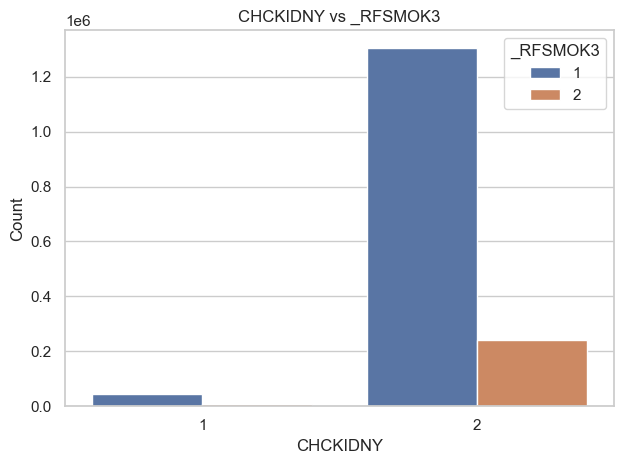

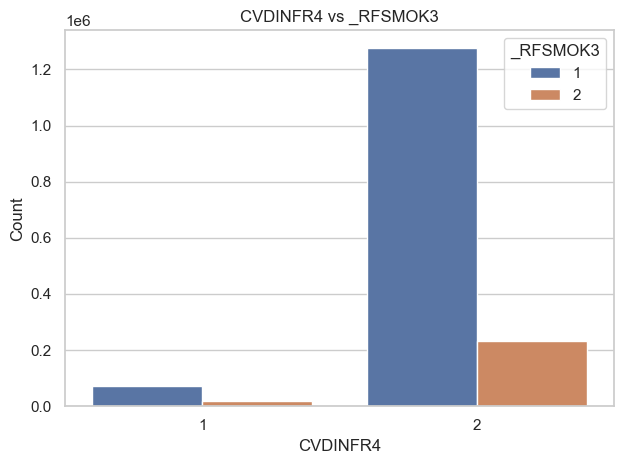

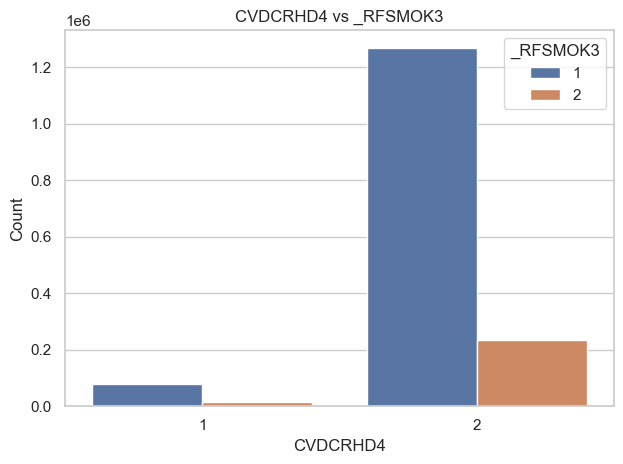

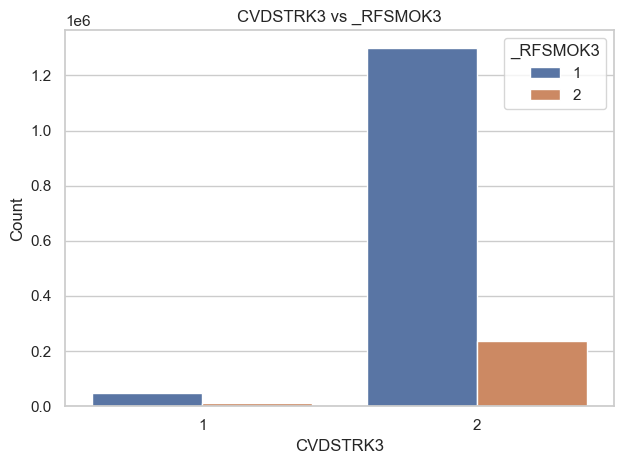

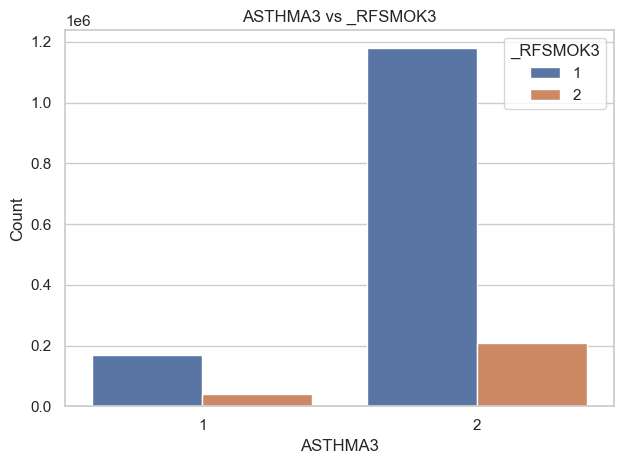

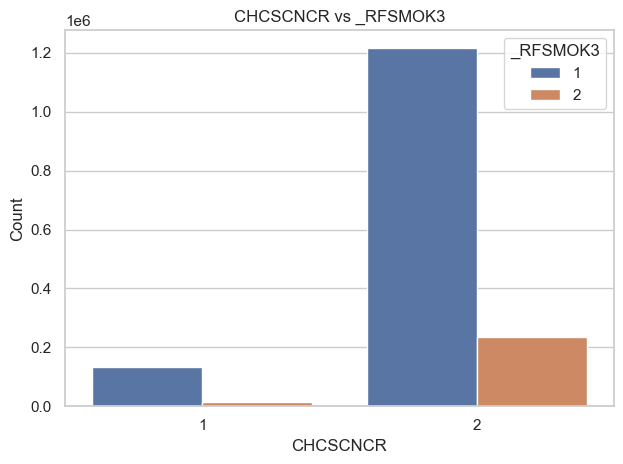

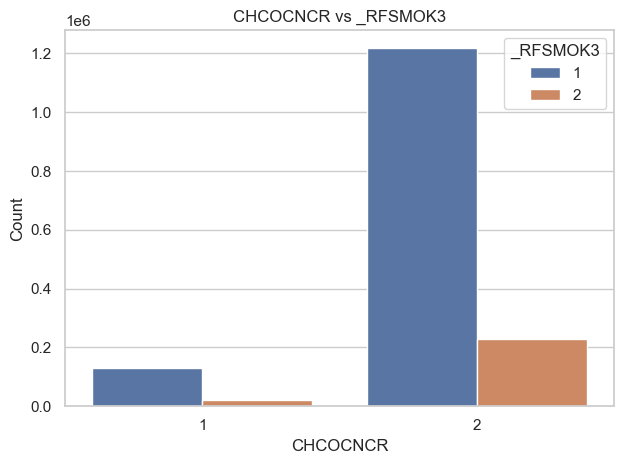

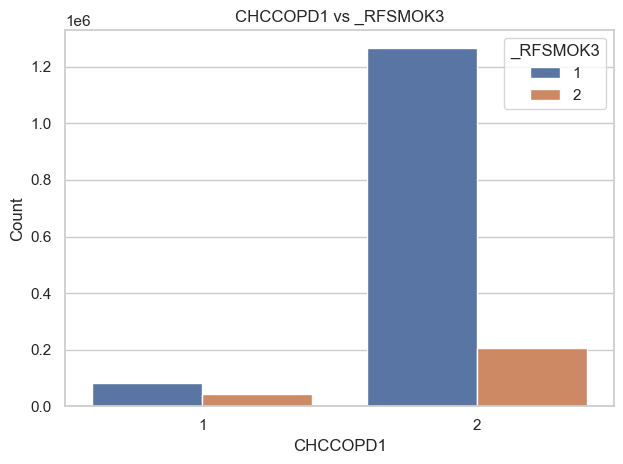

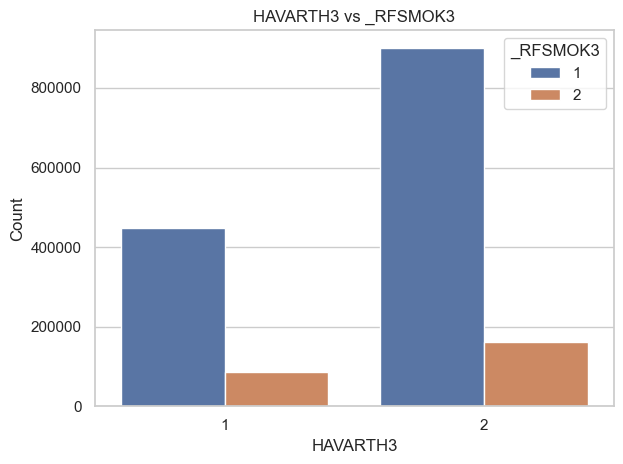

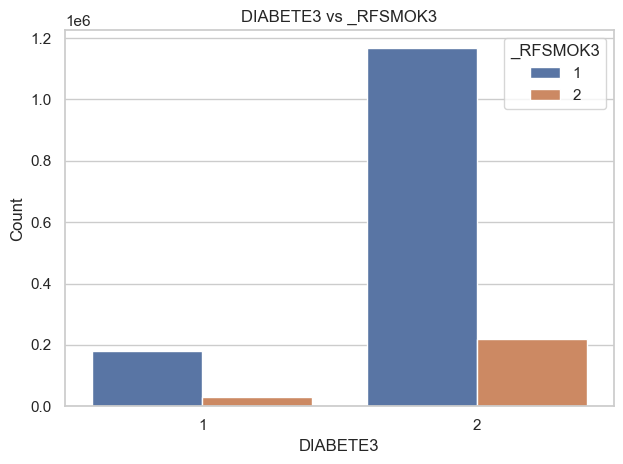

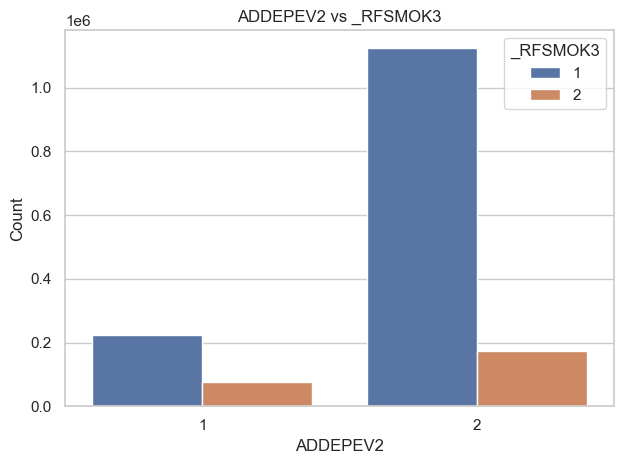

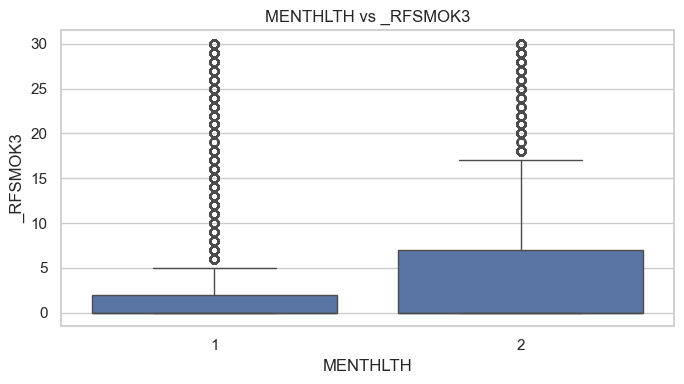

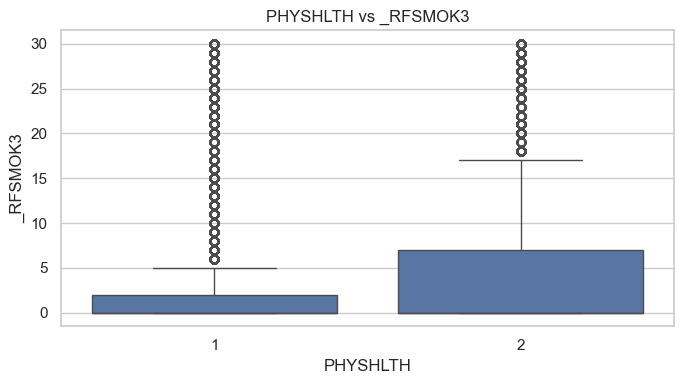

In [515]:
# Visualize relationship between Perceived Susceptibility variables and _RFSMOK3 by calling check_relationship_with_y
for feature in hbm_features['Perceived Susceptibility']:
    check_relationship_with_y(df, feature, '_RFSMOK3')


In [516]:
df['_RFSMOK3'].value_counts()  # should be binary like 1 and 0
#df['_RFSMOK3'] = df['_RFSMOK3'].astype(int)

_RFSMOK3
1    1348233
2     248838
Name: count, dtype: int64

In [517]:
print(df['_RFSMOK3'].value_counts())

_RFSMOK3
1    1348233
2     248838
Name: count, dtype: int64


Evaluate Marginal Effects of PERCEIVED SUSCEPTIBILITY

In [518]:
#calling function
# Fix and clean _RFSMOK3 values before calling your function
df['_RFSMOK3'] = df['_RFSMOK3'].map({1.0: 0, 2.0: 1})
df = df[df['_RFSMOK3'].isin([0, 1])]




In [519]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def plot_marginal_effects_by_construct_mixed(df, construct, y_col):
    features = [col for col in hbm_features[construct] if col in df.columns]
    
    # Separate categorical and numerical columns
    cat_cols = [col for col in features if str(df[col].dtype) in ['category', 'object']]
    num_cols = [col for col in features if col not in cat_cols]

    # One-hot encode categorical columns
    X_cat = pd.get_dummies(df[cat_cols], drop_first=True) if cat_cols else pd.DataFrame(index=df.index)
    X_num = df[num_cols] if num_cols else pd.DataFrame(index=df.index)

    # Combine
    X = pd.concat([X_num, X_cat], axis=1)

    # Convert all columns to numeric-compatible types
    for col in X.columns:
        if pd.api.types.is_bool_dtype(X[col]):
            X[col] = X[col].astype(int)
        elif pd.api.types.is_integer_dtype(X[col]):
            X[col] = X[col].astype(float)
        else:
            X[col] = pd.to_numeric(X[col], errors='coerce')

    # Convert y (target)
    y = df[y_col]
    if pd.api.types.is_integer_dtype(y) or pd.api.types.is_bool_dtype(y):
        y = y.astype(int)
    else:
        y = pd.to_numeric(y, errors='coerce').astype(int)

    # Drop missing values
    data = pd.concat([X, y], axis=1).dropna()
    X = data[X.columns]
    y = data[y_col]

    # Add constant
    X = sm.add_constant(X)

    # Fit Logit
    model = sm.Logit(y, X).fit(disp=0)

    # Marginal effects
    mfx = model.get_margeff()
    marginals = mfx.summary_frame()
    marginals = marginals.loc[X.columns[1:]]  # exclude constant

    # Plot
    plt.figure(figsize=(8, 6))
    plt.errorbar(
        marginals['dy/dx'], marginals.index,
        xerr=marginals['Std. Err.'], fmt='o'
    )
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f"Marginal Effects for {construct} Variables (Mixed Encoding)")
    plt.xlabel("Marginal Effect on P(Smoking)")
    plt.tight_layout()
    plt.show()


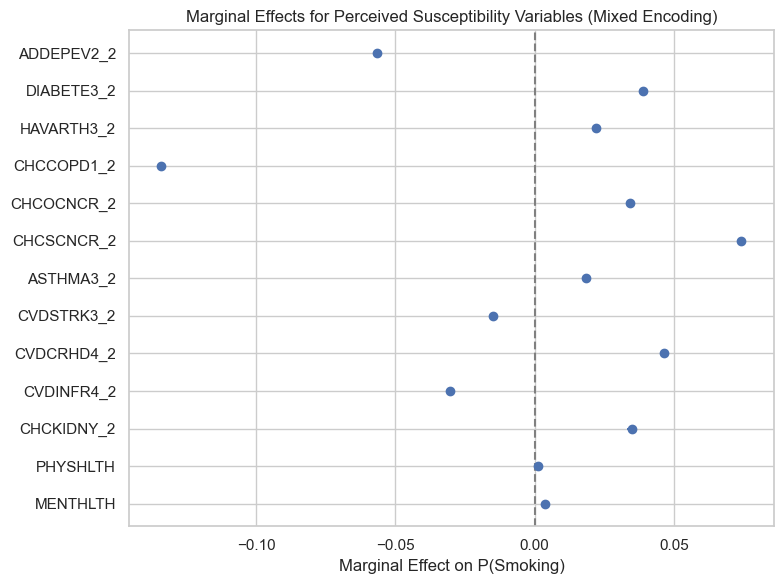

In [520]:

# Now safe to run
plot_marginal_effects_by_construct_mixed(df, 'Perceived Susceptibility', '_RFSMOK3')

This marginal effects plot shows how different variables influence the probability of smoking, with several key insights:
What it shows: Each point represents the marginal effect of a variable on smoking probability. The x-axis shows the change in probability of smoking when that variable increases by one unit (or changes from 0 to 1 for binary variables).
Key interpretations:
Protective factors (negative effects):

CHCOPD1_2 has the strongest protective effect (around -0.11), meaning this variable is associated with about 11 percentage points lower probability of smoking
ADDEPEV2_2 also shows a protective effect (around -0.06)

Risk factors (positive effects):

CHCSNCR_2 shows the strongest positive association (around 0.07), increasing smoking probability by about 7 percentage points
CVDCRHD4_2, DIABETE3_2, CHCSCNCR_2, CHCONCR_2, and CHCKIDNY_2 all show moderate positive associations with smoking

Near-neutral factors:

PHYSHLTH, MENTHLTH, CVDSTRK3_2, and CVDINFR4_2 show effects very close to zero

Important note: The dashed vertical line at zero helps identify which effects are meaningful. Variables with confidence intervals (if shown) that cross this line would be considered non-significant.

#### 2. Explore PERCEIVED SEVERITY features


In [521]:
# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Perceived Severity']:
    check_class_imbalance(df, feature)   


GENHLTH value counts:
GENHLTH
2    538018
3    482424
1    292344
4    200972
5     79948
7      1846
9      1519
Name: count, dtype: int64
Most common category proportion: 0.3368779471920785
-> Balanced

_RFHLTH value counts:
_RFHLTH
1    1312786
2     280920
9       3365
Name: count, dtype: int64
Most common category proportion: 0.8219960164576278
-> Imbalanced (dominant category > 80%)

QLACTLM2 value counts:
QLACTLM2
2    1214438
1     375682
7       4450
9       2501
Name: count, dtype: int64
Most common category proportion: 0.7604157861485181
-> Balanced
MENTHLTH not found or not categorical.
PHYSHLTH not found or not categorical.

USEEQUIP value counts:
USEEQUIP
2    1422977
1     171803
9       1541
7        750
Name: count, dtype: int64
Most common category proportion: 0.8909916966747252
-> Imbalanced (dominant category > 80%)


In [522]:
#find proportion of rows where values for hbm_features['Perceived Susceptibility'] are 7 and 9
for feature in hbm_features['Perceived Severity']:
    if feature in df.columns:
        proportion_7 = df[df[feature] == 7].shape[0] / df.shape[0]
        proportion_9 = df[df[feature] == 9].shape[0] / df.shape[0]
        combined_proportion = proportion_7 + proportion_9
        if proportion_7 < 0.05 and proportion_9 < 0.05:
            print(f"\n{feature} has low combined proportion of 7 and 9 values: {combined_proportion:.4f}")
    else:
        print(f"{feature} not found in dataframe.")



GENHLTH has low combined proportion of 7 and 9 values: 0.0021

_RFHLTH has low combined proportion of 7 and 9 values: 0.0021

QLACTLM2 has low combined proportion of 7 and 9 values: 0.0044

MENTHLTH has low combined proportion of 7 and 9 values: 0.0136

PHYSHLTH has low combined proportion of 7 and 9 values: 0.0188

USEEQUIP has low combined proportion of 7 and 9 values: 0.0014


In [523]:
#lets drop the rows where values for hbm_features['Perceived Severity'] are 7 and 9
# also drop these categories for these features
for feature in hbm_features['Perceived Severity']:
    if feature in df.columns and df[feature].dtype.name == 'category':
        df = df[(df[feature] != 7) & (df[feature] != 9)]
        df[feature] = df[feature].cat.remove_unused_categories()
    else:
        print(f"{feature} not found in dataframe.")

MENTHLTH not found in dataframe.
PHYSHLTH not found in dataframe.


Lets check class imbalance again

In [524]:
# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Perceived Severity']:
    check_class_imbalance(df, feature)   


GENHLTH value counts:
GENHLTH
2    535980
3    479549
1    291532
4    199442
5     79372
Name: count, dtype: int64
Most common category proportion: 0.33797115157247576
-> Balanced

_RFHLTH value counts:
_RFHLTH
1    1307061
2     278814
Name: count, dtype: int64
Most common category proportion: 0.8241891700165523
-> Imbalanced (dominant category > 80%)

QLACTLM2 value counts:
QLACTLM2
2    1211929
1     373946
Name: count, dtype: int64
Most common category proportion: 0.7642020966343501
-> Balanced
MENTHLTH not found or not categorical.
PHYSHLTH not found or not categorical.

USEEQUIP value counts:
USEEQUIP
2    1415524
1     170351
Name: count, dtype: int64
Most common category proportion: 0.8925823283676204
-> Imbalanced (dominant category > 80%)


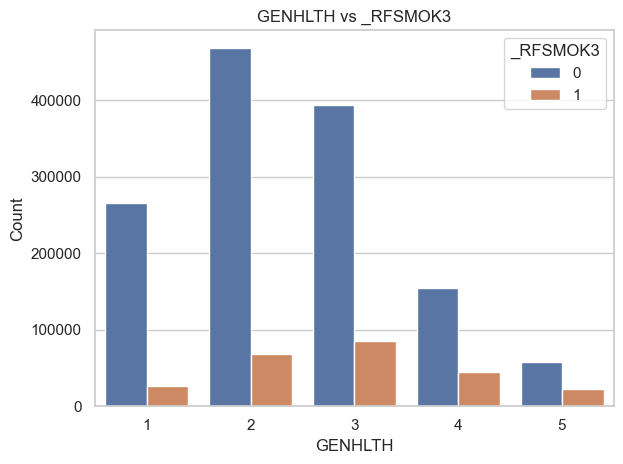

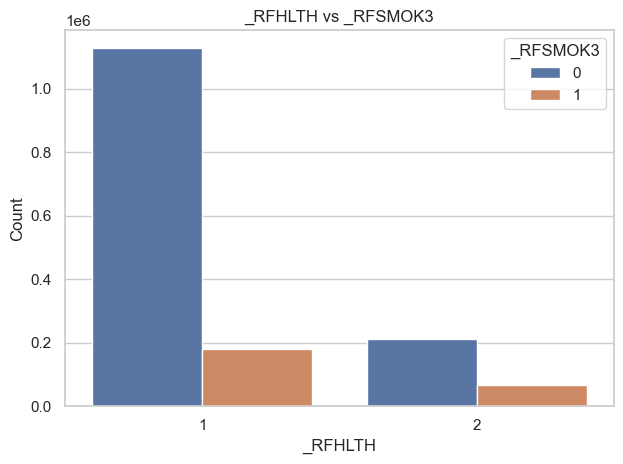

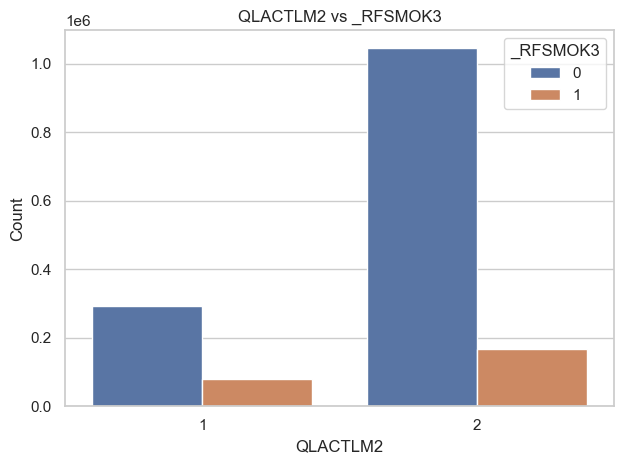

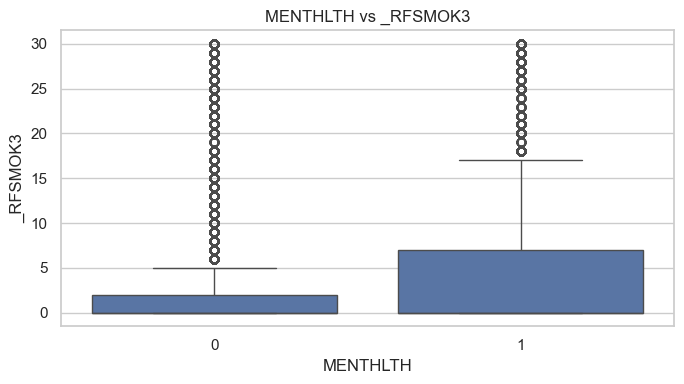

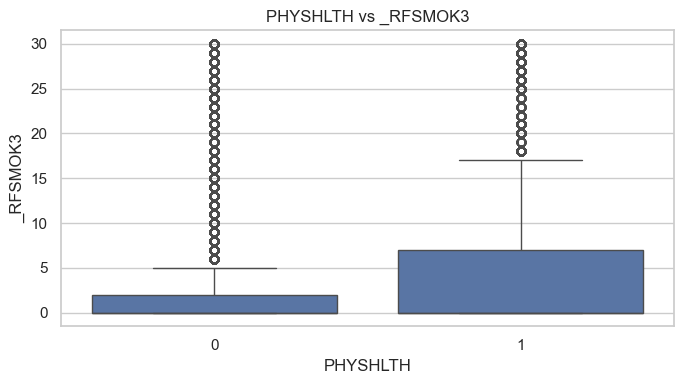

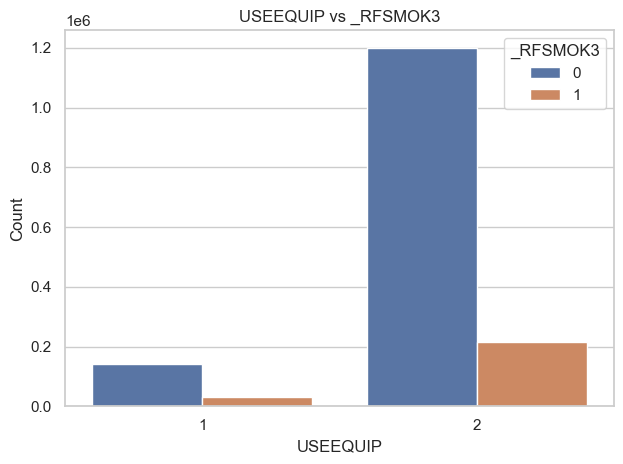

In [525]:
# Visualize relationship between Perceived Susceptibility variables and _RFSMOK3 by calling check_relationship_with_y
for feature in hbm_features['Perceived Severity']:  
    check_relationship_with_y(df, feature, '_RFSMOK3')

In [526]:
#Lets evaluate GENHLTH variable in detail
df['GENHLTH'].dtypes
print(df['GENHLTH'].value_counts(dropna=False, normalize=True))

GENHLTH
2    0.337971
3    0.302388
1    0.183830
4    0.125761
5    0.050049
Name: proportion, dtype: float64


Since all 5 bins are >=0.05, they are significant and we won't be squashing categories of GENHLTH

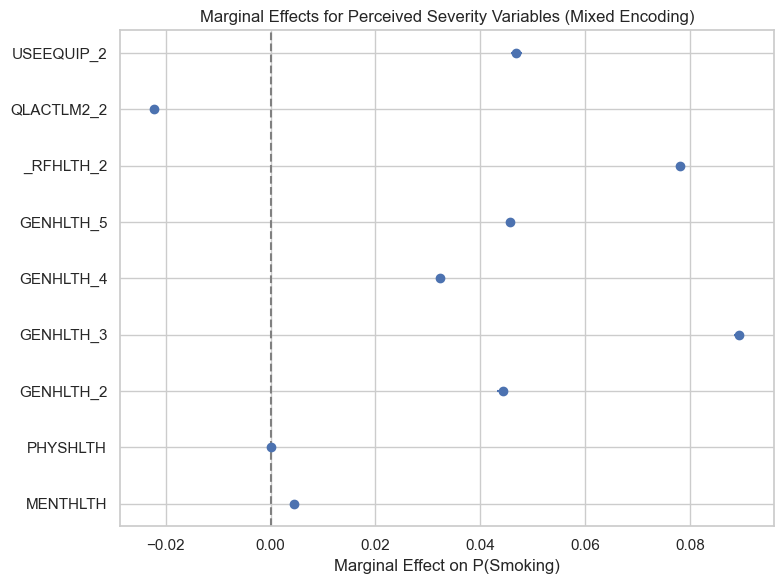

In [527]:

# Now safe to run
plot_marginal_effects_by_construct_mixed(df, 'Perceived Severity', '_RFSMOK3')

Strong Positive Effects (Increase Smoking Probability):

GENHLTH_5 (~0.12): Having the worst general health category increases smoking probability by about 12 percentage points
GENHLTH_4 (~0.11): Second-worst health category increases smoking probability by about 11 percentage points
GENHLTH_3 (~0.09): Middle health category increases smoking probability by about 9 percentage points

Moderate Positive Effects:

GENHLTH_2 (~0.04): Second-best health category increases smoking probability by about 4 percentage points
USEEQUIP_2 (~0.05): This equipment use category increases smoking probability by about 5 percentage points

Negative Effects (Decrease Smoking Probability):

QLACTLM2_2 (~-0.02): This activity limitation category decreases smoking probability by about 2 percentage points
MENTHLTH (~-0.01): Mental health days slightly decreases smoking probability
PHYSHLTH (~0.00): Physical health days has essentially no effect

Pattern Interpretation:
Health Status Paradox: The most striking finding is that worse general health status strongly predicts higher smoking probability. This suggests:

Self-medication hypothesis: People with poor health may smoke to cope with stress/discomfort
Reverse causation: Poor health might be a consequence of smoking, creating a cycle
Fatalistic attitude: Those already in poor health may feel "what's the point of quitting now?"

Reference Categories:

GENHLTH_1 (excellent health) is the reference category
All other health categories show increasing smoking probability as health worsens
This creates a clear dose-response relationship: worse health → higher smoking probability

#### 3. Explore PERCEIVED BENEFITS features


In [528]:
# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Perceived Benefits']:
    check_class_imbalance(df, feature)   


CHECKUP1 value counts:
CHECKUP1
1    1154006
2     187425
3     109630
4     105583
7      14816
8      13335
9       1080
Name: count, dtype: int64
Most common category proportion: 0.7276777804051391
-> Balanced

HLTHPLN1 value counts:
HLTHPLN1
1    1434441
2     147213
7       2644
9       1577
Name: count, dtype: int64
Most common category proportion: 0.9045107590446915
-> Imbalanced (dominant category > 80%)

PERSDOC2 value counts:
PERSDOC2
1    1218778
3     238293
2     124475
7       3036
9       1293
Name: count, dtype: int64
Most common category proportion: 0.7685208481122409
-> Balanced

EXERANY2 value counts:
EXERANY2
1    1169085
2     380952
7      33093
9       2745
Name: count, dtype: int64
Most common category proportion: 0.7371860960037834
-> Balanced

PNEUVAC3 value counts:
PNEUVAC3
2    845093
1    554069
7    183109
9      3604
Name: count, dtype: int64
Most common category proportion: 0.5328875226609916
-> Balanced

HIVTST6 value counts:
HIVTST6
2    1039276
1    

In [529]:
#find proportion of rows where values for hbm_features['Perceived Susceptibility'] are 7 and 9
for feature in hbm_features['Perceived Benefits']:
    if feature in df.columns:
        proportion_7 = df[df[feature] == 7].shape[0] / df.shape[0]
        proportion_9 = df[df[feature] == 9].shape[0] / df.shape[0]
        combined_proportion = proportion_7 + proportion_9
        if proportion_7 < 0.05 and proportion_9 < 0.05:
            print(f"\n{feature} has low combined proportion of 7 and 9 values: {combined_proportion:.4f}")
    else:
        print(f"{feature} not found in dataframe.")



CHECKUP1 has low combined proportion of 7 and 9 values: 0.0100

HLTHPLN1 has low combined proportion of 7 and 9 values: 0.0027

PERSDOC2 has low combined proportion of 7 and 9 values: 0.0027

EXERANY2 has low combined proportion of 7 and 9 values: 0.0226


In [530]:
#lets drop the rows where values for hbm_features['Perceived Severity'] are 7 and 9
# also drop these categories for these features
for feature in hbm_features['Perceived Benefits']:
    if feature in df.columns and df[feature].dtype.name == 'category':
        df = df[(df[feature] != 7) & (df[feature] != 9)]
        df[feature] = df[feature].cat.remove_unused_categories()
    else:
        print(f"{feature} not found in dataframe.")

In [531]:
# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Perceived Benefits']:
    check_class_imbalance(df, feature)   


CHECKUP1 value counts:
CHECKUP1
1    589063
2    120734
3     74783
4     72963
8      8703
Name: count, dtype: int64
Most common category proportion: 0.6800181472699441
-> Balanced

HLTHPLN1 value counts:
HLTHPLN1
1    753406
2    112840
Name: count, dtype: int64
Most common category proportion: 0.8697367722332917
-> Imbalanced (dominant category > 80%)

PERSDOC2 value counts:
PERSDOC2
1    642326
3    162262
2     61658
Name: count, dtype: int64
Most common category proportion: 0.7415052998801726
-> Balanced

EXERANY2 value counts:
EXERANY2
1    672083
2    194163
Name: count, dtype: int64
Most common category proportion: 0.7758569736541352
-> Balanced

PNEUVAC3 value counts:
PNEUVAC3
2    666003
1    200243
Name: count, dtype: int64
Most common category proportion: 0.7688381822253725
-> Balanced

HIVTST6 value counts:
HIVTST6
2    538275
1    327971
Name: count, dtype: int64
Most common category proportion: 0.6213881507100755
-> Balanced

_HCVU651 value counts:
_HCVU651
1    753406

Lets check if the bins in CHECKUP1 are significant or if we need to rebin or clip them

In [532]:
#Lets evaluate GENHLTH variable in detail
df['CHECKUP1'].dtypes
print(df['CHECKUP1'].value_counts(dropna=False, normalize=True))

CHECKUP1
1    0.680018
2    0.139376
3    0.086330
4    0.084229
8    0.010047
Name: proportion, dtype: float64


In [533]:
from pandas.api.types import CategoricalDtype
# Define the categorical type for CHECKUP1 with ordered categories 

chckup_order = CategoricalDtype(categories=[1, 2, 3, 4, 8], ordered=True)
df['CHECKUP1'] = df['CHECKUP1'].astype(chckup_order)

df['CHECKUP1'].value_counts()

CHECKUP1
1    589063
2    120734
3     74783
4     72963
8      8703
Name: count, dtype: int64

Seems like Category 8 in CHECKUP1, can be clubbed with category 4

In [534]:
df['CHECKUP1'] = df['CHECKUP1'].clip(upper=4)
#drop category 8 from CHECKUP1
# This will remove rows where CHECKUP1 is 8 and also drop the category 8
df = df[df['CHECKUP1'] != 8]
df['CHECKUP1'] = df['CHECKUP1'].cat.remove_unused_categories()
print(df['CHECKUP1'].value_counts())

CHECKUP1
1    589063
2    120734
4     81666
3     74783
Name: count, dtype: int64


Lets check if the bins in PERSDOC2 are significant or if we need to rebin or clip them

In [535]:
#Lets evaluate GENHLTH variable in detail
df['PERSDOC2'].dtypes
print(df['PERSDOC2'].value_counts(dropna=False, normalize=True))

PERSDOC2
1    0.741505
3    0.187316
2    0.071178
Name: proportion, dtype: float64


Seems like all bins are significant so we keep it as it is

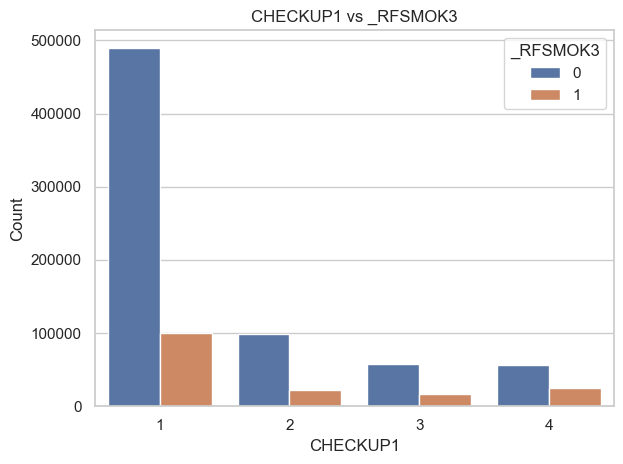

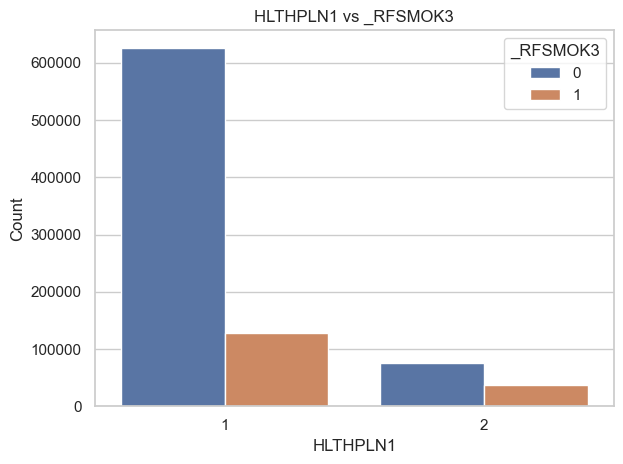

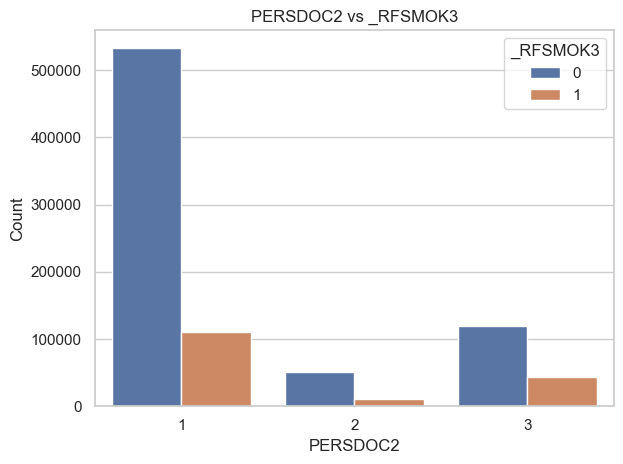

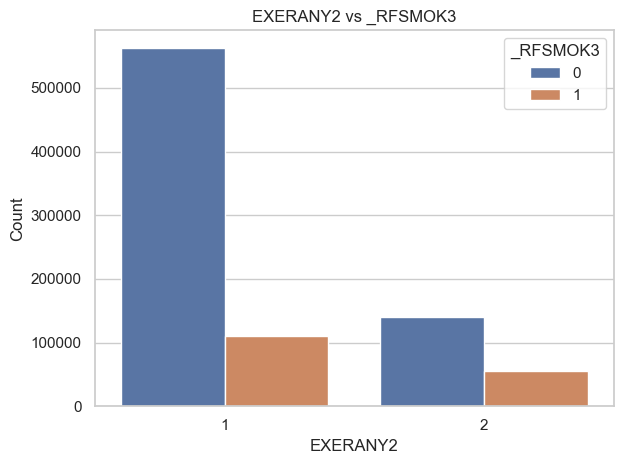

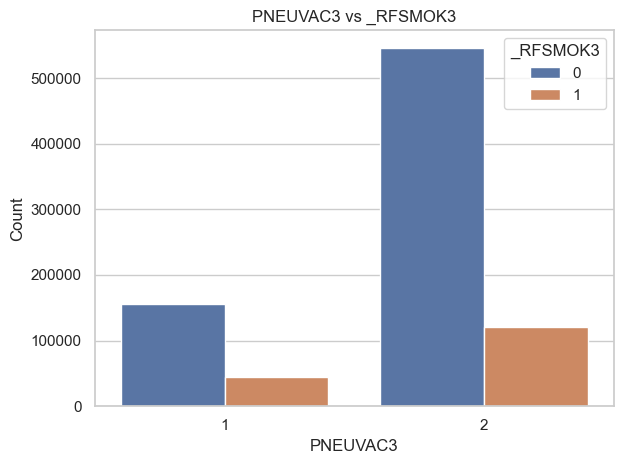

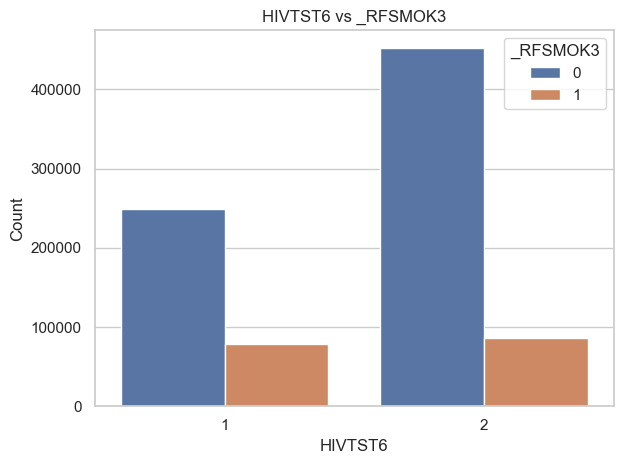

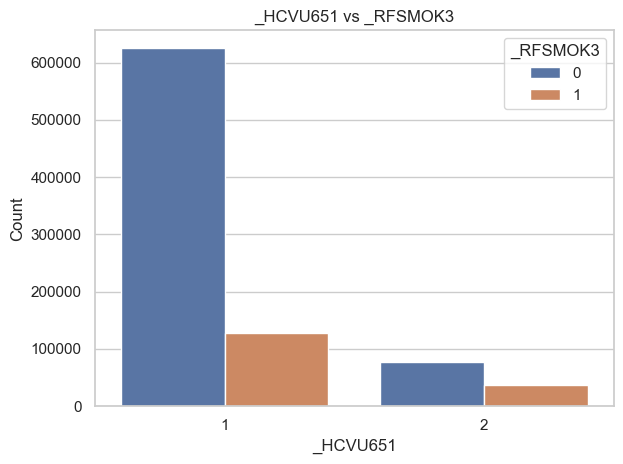

In [536]:
# Visualize relationship between Perceived Susceptibility variables and _RFSMOK3 by calling check_relationship_with_y
for feature in hbm_features['Perceived Benefits']:  
    check_relationship_with_y(df, feature, '_RFSMOK3')

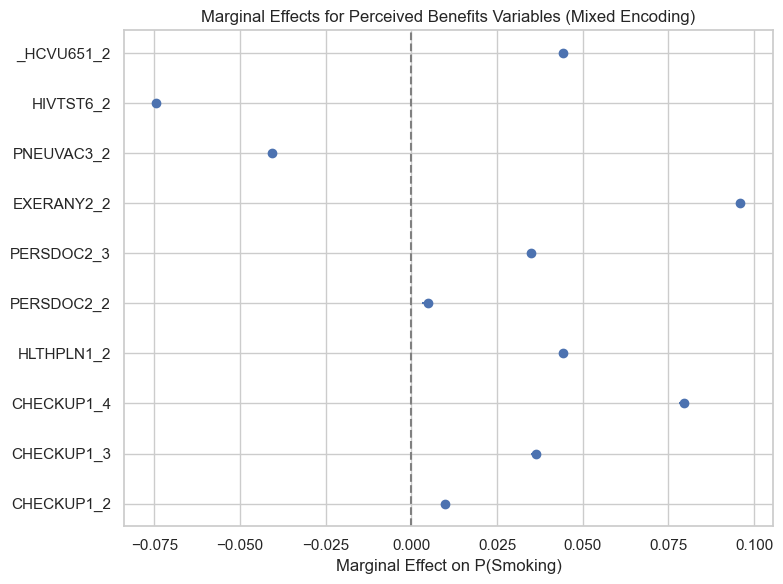

In [537]:

# Now safe to run
plot_marginal_effects_by_construct_mixed(df, 'Perceived Benefits', '_RFSMOK3')

EXERANY2_2: Strongest positive effect (~0.08) - not exercising increases smoking probability
HLTHPLN1_2: Strong positive effect (~0.08) - lacking health insurance increases smoking likelihood
CHECKUP1_4: Positive effect (~0.07) - infrequent medical checkups associated with higher smoking
CHECKUP1_3: Moderate positive effect (~0.04) - less frequent checkups still increase smoking probability
PERSDOC2_3: Positive effect (~0.04) - having multiple personal doctors increases smoking risk

Negative associations:

HIVTST6_2: Strong negative effect (~-0.08) - not having HIV testing decreases smoking probability
PERSDOC2_2: Slight negative effect - having one personal doctor slightly reduces smoking

#### 4. Explore PERCEIVED BARRIERS features

In [538]:
# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Perceived Barriers']:
    check_class_imbalance(df, feature)   



MEDCOST value counts:
MEDCOST
2    741930
1    123210
7       932
9       174
Name: count, dtype: int64
Most common category proportion: 0.856488803411502
-> Imbalanced (dominant category > 80%)

RENTHOM1 value counts:
RENTHOM1
1    608026
2    215338
3     39353
9      2440
7      1089
Name: count, dtype: int64
Most common category proportion: 0.7019091574448829
-> Balanced

_INCOMG value counts:
_INCOMG
5    414185
2    112919
4    108599
1     82230
3     74284
9     74029
Name: count, dtype: int64
Most common category proportion: 0.4781378499871861
-> Balanced

_EDUCAG value counts:
_EDUCAG
4    335763
3    247230
2    228596
1     54657
Name: count, dtype: int64
Most common category proportion: 0.3876069846209968
-> Balanced

VETERAN3 value counts:
VETERAN3
2    792720
1     73202
9       220
7       104
Name: count, dtype: int64
Most common category proportion: 0.9151211087843407
-> Imbalanced (dominant category > 80%)

SEX value counts:
SEX
2    495285
1    370961
Name: count, 

In [539]:

#find proportion of rows where values for hbm_features['Perceived Susceptibility'] are 7 and 9
for feature in hbm_features['Perceived Barriers']:
    if feature in df.columns:
        proportion_7 = df[df[feature] == 7].shape[0] / df.shape[0]
        proportion_9 = df[df[feature] == 9].shape[0] / df.shape[0]
        combined_proportion = proportion_7 + proportion_9
        if proportion_7 < 0.05 and proportion_9 < 0.05:
            print(f"\n{feature} has low combined proportion of 7 and 9 values: {combined_proportion:.4f}")
    else:
        print(f"{feature} not found in dataframe.")



MEDCOST has low combined proportion of 7 and 9 values: 0.0013

RENTHOM1 has low combined proportion of 7 and 9 values: 0.0041

_EDUCAG has low combined proportion of 7 and 9 values: 0.0000

VETERAN3 has low combined proportion of 7 and 9 values: 0.0004

SEX has low combined proportion of 7 and 9 values: 0.0000


In [540]:

#lets drop the rows where values for hbm_features['Perceived Severity'] are 7 and 9
# also drop these categories for these features
for feature in hbm_features['Perceived Barriers']:
    if feature in df.columns and df[feature].dtype.name == 'category':
        df = df[(df[feature] != 7) & (df[feature] != 9)]
        df[feature] = df[feature].cat.remove_unused_categories()
    else:
        print(f"{feature} not found in dataframe.")


In [541]:


# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Perceived Barriers']:
    check_class_imbalance(df, feature)   



MEDCOST value counts:
MEDCOST
2    676783
1    112526
Name: count, dtype: int64
Most common category proportion: 0.857437328093307
-> Imbalanced (dominant category > 80%)

RENTHOM1 value counts:
RENTHOM1
1    560836
2    197005
3     31468
Name: count, dtype: int64
Most common category proportion: 0.7105404854119236
-> Balanced

_INCOMG value counts:
_INCOMG
5    413181
2    112285
4    108205
1     81714
3     73924
Name: count, dtype: int64
Most common category proportion: 0.5234717962166908
-> Balanced

_EDUCAG value counts:
_EDUCAG
4    312808
3    225835
2    203715
1     46951
Name: count, dtype: int64
Most common category proportion: 0.3963061361266627
-> Balanced

VETERAN3 value counts:
VETERAN3
2    721010
1     68299
Name: count, dtype: int64
Most common category proportion: 0.9134698831509587
-> Imbalanced (dominant category > 80%)

SEX value counts:
SEX
2    448379
1    340930
Name: count, dtype: int64
Most common category proportion: 0.5680652317406745
-> Balanced


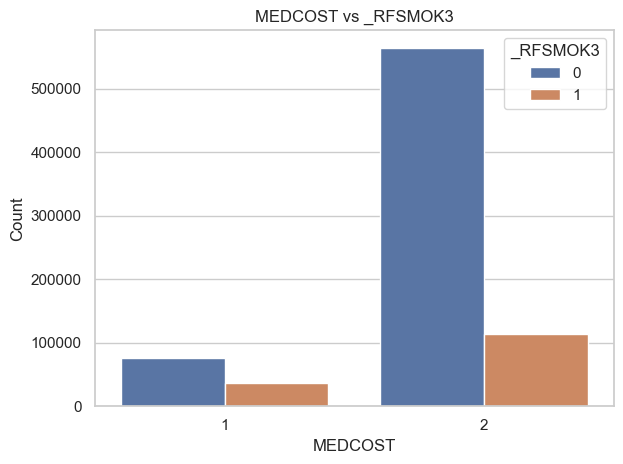

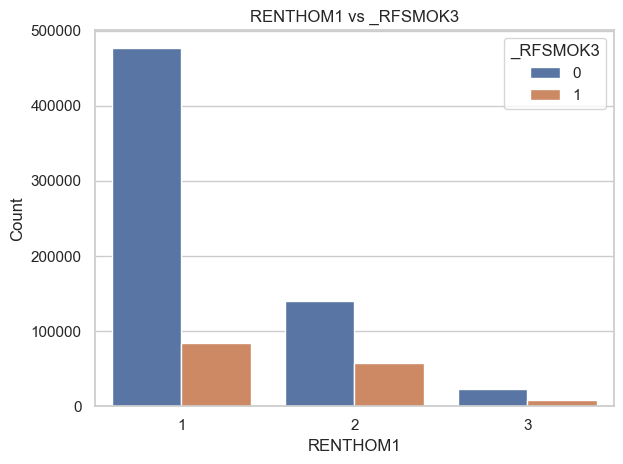

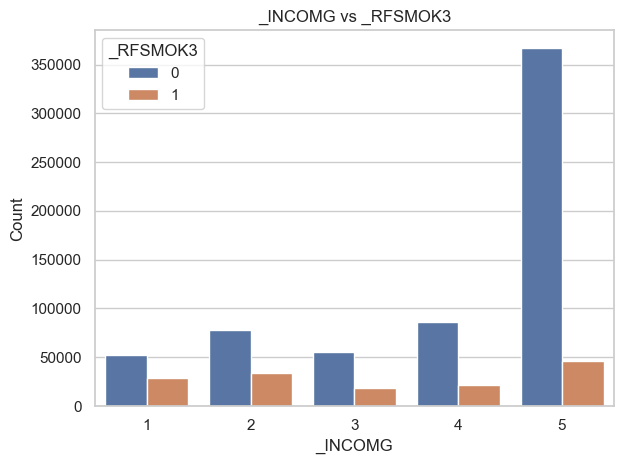

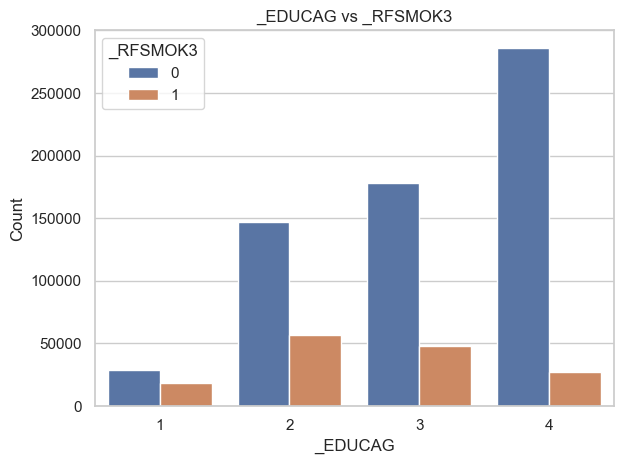

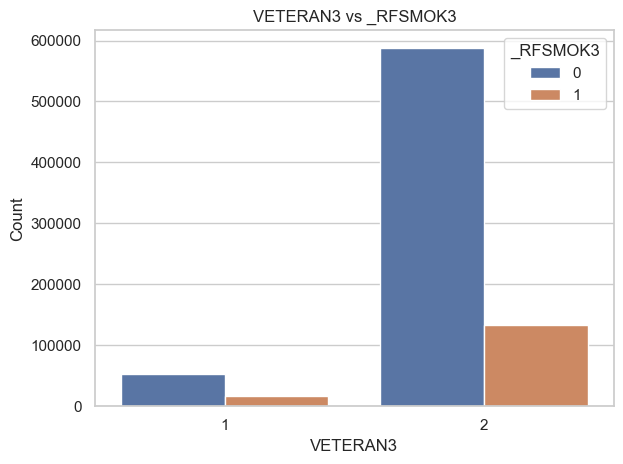

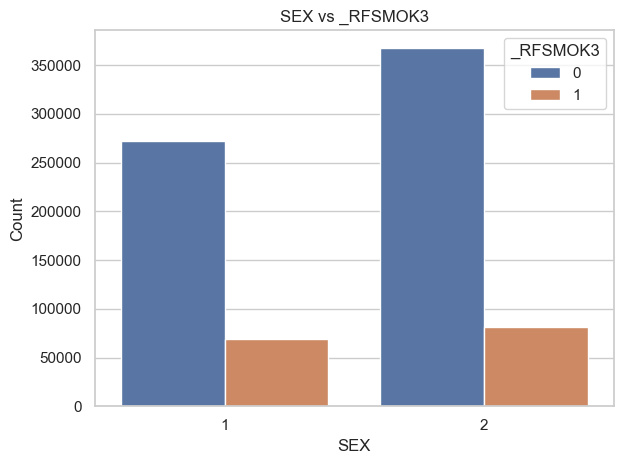

In [542]:

# Visualize relationship between Perceived Susceptibility variables and _RFSMOK3 by calling check_relationship_with_y
for feature in hbm_features['Perceived Barriers']:  
    check_relationship_with_y(df, feature, '_RFSMOK3')


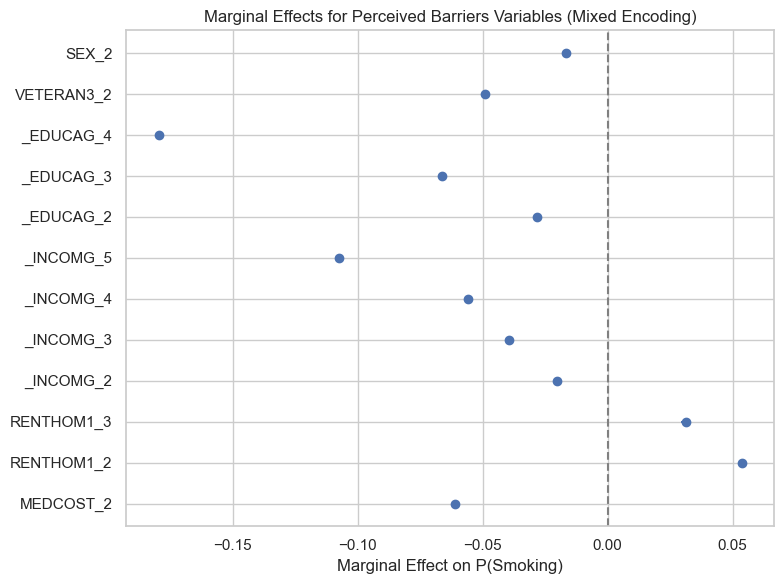

In [543]:

plot_marginal_effects_by_construct_mixed(df, 'Perceived Barriers', '_RFSMOK3')

Positive associations with smoking:

RENTHOM1_2 & RENTHOM1_3: Housing instability (renting vs. owning) shows strong positive effects (~0.05-0.08)

Negative associations:

_EDUCAG_4: Strong negative effect (~-0.12) - higher education substantially reduces smoking <br>
MEDCOST_2: Negative effect (~-0.08) - medical cost concerns reduce smoking probability <br>
Income variables (_INCOMG_2 through _INCOMG_5): All show negative effe

#### 5. Explore  CUES TO ACTION features

In [544]:
# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Cues to Action']:
    check_class_imbalance(df, feature)   



CHECKUP1 value counts:
CHECKUP1
1    536554
2    110241
4     74111
3     68403
Name: count, dtype: int64
Most common category proportion: 0.6797768681213567
-> Balanced

DRNKANY5 value counts:
DRNKANY5
1    448671
2    336620
7      3148
9       870
Name: count, dtype: int64
Most common category proportion: 0.5684351755776255
-> Balanced

DROCDY3_ value counts:
DROCDY3_
5.397605e-79    336620
3.000000e+00     70464
7.000000e+00     55946
1.400000e+01     34884
1.000000e+02     34461
1.000000e+01     32306
2.900000e+01     29621
1.300000e+01     27536
1.700000e+01     27525
3.300000e+01     21217
4.300000e+01     20109
5.000000e+01     16023
6.700000e+01     15936
2.000000e+01     10056
5.700000e+01      9175
7.100000e+01      8302
2.700000e+01      8158
2.300000e+01      6671
8.300000e+01      6094
9.000000e+02      4018
4.000000e+01      3930
8.600000e+01      2624
9.300000e+01      1745
4.700000e+01      1337
9.700000e+01       639
3.000000e+01       632
6.000000e+01       524
5.30

In [545]:

#find proportion of rows where values for hbm_features['Perceived Susceptibility'] are 7 and 9
for feature in hbm_features['Cues to Action']:
    if feature in df.columns:
        proportion_7 = df[df[feature] == 7].shape[0] / df.shape[0]
        proportion_9 = df[df[feature] == 9].shape[0] / df.shape[0]
        combined_proportion = proportion_7 + proportion_9
        if proportion_7 < 0.05 and proportion_9 < 0.05:
            print(f"\n{feature} has low combined proportion of 7 and 9 values: {combined_proportion:.4f}")
    else:
        print(f"{feature} not found in dataframe.")



CHECKUP1 has low combined proportion of 7 and 9 values: 0.0000

DRNKANY5 has low combined proportion of 7 and 9 values: 0.0051

SMOKE100 has low combined proportion of 7 and 9 values: 0.0000

USENOW3 has low combined proportion of 7 and 9 values: 0.0005

_SMOKER3 has low combined proportion of 7 and 9 values: 0.0000

_RFBING5 has low combined proportion of 7 and 9 values: 0.0102

_ASTHMS1 has low combined proportion of 7 and 9 values: 0.0029


In [546]:
#find proportion of rows where values for hbm_features['Perceived Susceptibility'] are 7 and 9
for feature in hbm_features['Cues to Action']:
    if feature in df.columns:
        proportion_9 = df[df[feature] == 9].shape[0] / df.shape[0]
        if proportion_9 < 0.05:
            print(f"\n{feature} has low combined proportion of 9 values: {proportion_9:.4f}")
    else:
        print(f"{feature} not found in dataframe.")


CHECKUP1 has low combined proportion of 9 values: 0.0000

DRNKANY5 has low combined proportion of 9 values: 0.0011

DROCDY3_ has low combined proportion of 9 values: 0.0000

SMOKE100 has low combined proportion of 9 values: 0.0000

USENOW3 has low combined proportion of 9 values: 0.0003

_SMOKER3 has low combined proportion of 9 values: 0.0000

_RFBING5 has low combined proportion of 9 values: 0.0102

_ASTHMS1 has low combined proportion of 9 values: 0.0029


In [547]:

#lets drop the rows where values for hbm_features['Perceived Severity'] are 7 and 9
# also drop these categories for these features
for feature in hbm_features['Cues to Action']:
    if feature in df.columns and df[feature].dtype.name == 'category':
        df = df[(df[feature] != 7) | (df[feature] != 9)]
        df[feature] = df[feature].cat.remove_unused_categories()
    else:
        print(f"{feature} not found in dataframe.")


USENOW3 can be reduced to 2 classes

In [548]:
#remap some values of USENOW3 where 1, 2 is now 1 and 3 is now 2
if 'USENOW3' in df.columns:
    df['USENOW3'] = df['USENOW3'].replace({1: 1, 2: 1, 3: 2})
    df['USENOW3'] = df['USENOW3'].astype(int).astype('category')
    print("Updated USENOW3 value counts:")
    print(df['USENOW3'].value_counts())

Updated USENOW3 value counts:
USENOW3
2    758600
1     30306
9       272
7       131
Name: count, dtype: int64


/var/folders/m2/ycqz5h_d2y55049kl0cst9rm0000gn/T/ipykernel_30528/971029558.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['USENOW3'] = df['USENOW3'].replace({1: 1, 2: 1, 3: 2})


_SMOKER3 can also be classified into fewer categories

In [549]:
#remap some values of USENOW3 where 1, 2 is now 1 and 3 is now 2
if '_SMOKER3' in df.columns:
    df['_SMOKER3'] = df['_SMOKER3'].replace({1: 1, 2: 1, 3: 2, 4: 2})
    df['_SMOKER3'] = df['_SMOKER3'].astype(int).astype('category')
    print("Updated _SMOKER3 value counts:")
    print(df['_SMOKER3'].value_counts())

Updated _SMOKER3 value counts:
_SMOKER3
2    639529
1    149780
Name: count, dtype: int64


/var/folders/m2/ycqz5h_d2y55049kl0cst9rm0000gn/T/ipykernel_30528/3998121673.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['_SMOKER3'] = df['_SMOKER3'].replace({1: 1, 2: 1, 3: 2, 4: 2})


Evaluate proportion of _ASTHMS1 categories

In [550]:
#Evaluate proportion of _ASTHMS1 valuecounts
if '_ASTHMS1' in df.columns:
    print("Proportion of _ASTHMS1 value counts:")
    print(df['_ASTHMS1'].value_counts(normalize=True))
else:
    print("_ASTHMS1 column not found in dataframe.")

Proportion of _ASTHMS1 value counts:
_ASTHMS1
3    0.861233
1    0.095807
2    0.040027
9    0.002933
Name: proportion, dtype: float64


Since everything is significant, lets keep the classes

NOw lets convert the values of SMOKE100 and _RFBING5 into whole numbers

In [551]:
#NOw lets convert the values of SMOKE100 and _RFBING5 into whole numbers
if 'SMOKE100' in df.columns:
    df['SMOKE100'] = df['SMOKE100'].astype(int).astype('category')
    print("Updated SMOKE100 value counts:")
    print(df['SMOKE100'].value_counts())
if '_RFBING5' in df.columns:
    df['_RFBING5'] = df['_RFBING5'].astype(int).astype('category')
    print("Updated _RFBING5 value counts:")
    print(df['_RFBING5'].value_counts())





Updated SMOKE100 value counts:
SMOKE100
2    452772
1    336537
Name: count, dtype: int64
Updated _RFBING5 value counts:
_RFBING5
1    646760
2    134489
9      8060
Name: count, dtype: int64


In [552]:


# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Cues to Action']:
    check_class_imbalance(df, feature)   



CHECKUP1 value counts:
CHECKUP1
1    536554
2    110241
4     74111
3     68403
Name: count, dtype: int64
Most common category proportion: 0.6797768681213567
-> Balanced

DRNKANY5 value counts:
DRNKANY5
1    448671
2    336620
7      3148
9       870
Name: count, dtype: int64
Most common category proportion: 0.5684351755776255
-> Balanced

DROCDY3_ value counts:
DROCDY3_
5.397605e-79    336620
3.000000e+00     70464
7.000000e+00     55946
1.400000e+01     34884
1.000000e+02     34461
1.000000e+01     32306
2.900000e+01     29621
1.300000e+01     27536
1.700000e+01     27525
3.300000e+01     21217
4.300000e+01     20109
5.000000e+01     16023
6.700000e+01     15936
2.000000e+01     10056
5.700000e+01      9175
7.100000e+01      8302
2.700000e+01      8158
2.300000e+01      6671
8.300000e+01      6094
9.000000e+02      4018
4.000000e+01      3930
8.600000e+01      2624
9.300000e+01      1745
4.700000e+01      1337
9.700000e+01       639
3.000000e+01       632
6.000000e+01       524
5.30

Lets visualize teh numeric variable DROCDY3_

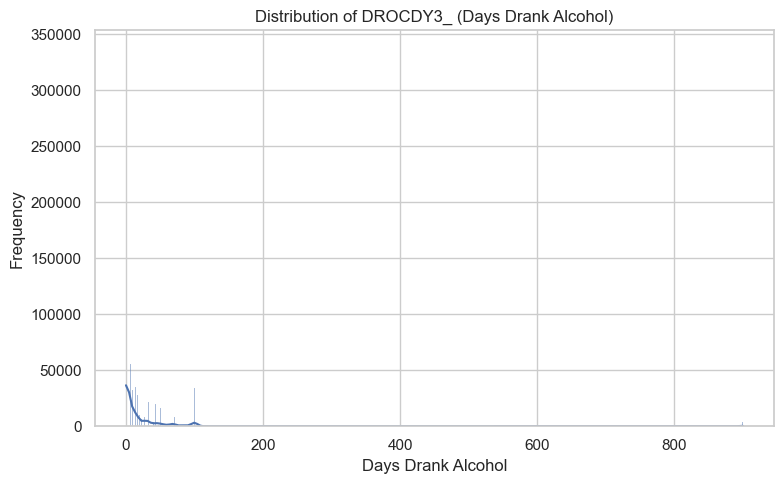

In [553]:
#visuatlize distribution of DROCDY3_
if 'DROCDY3_' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['DROCDY3_'], bins=30, kde=True)
    plt.title('Distribution of DROCDY3_ (Days Drank Alcohol)')
    plt.xlabel('Days Drank Alcohol')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("DROCDY3_ column not found in dataframe.")

In [554]:
#Since there are a lot of 0-values, lets categorize it into clinically meaningful groups 
if 'DROCDY3_' in df.columns:
    # Create a new categorical variable based on DROCDY3_
    df['DROCDY3_'] = pd.cut(df['DROCDY3_'], bins=[-1, 0, 1, 7, 30, 365], 
                               labels=['None', '1-2 days', '3-7 days', '8-30 days', '31+ days'])
    print("Updated DROCDY3_ value counts:")
    print(df['DROCDY3_'].value_counts())
else:
    print("DROCDY3_ column not found in dataframe.")

Updated DROCDY3_ value counts:
DROCDY3_
1-2 days     336620
8-30 days    177389
31+ days     144872
3-7 days     126410
None              0
Name: count, dtype: int64


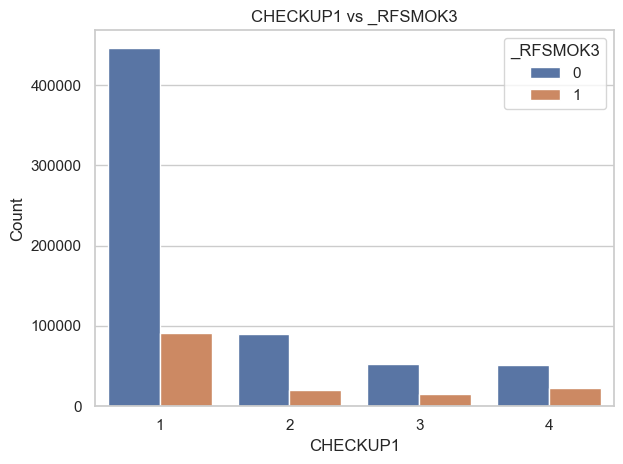

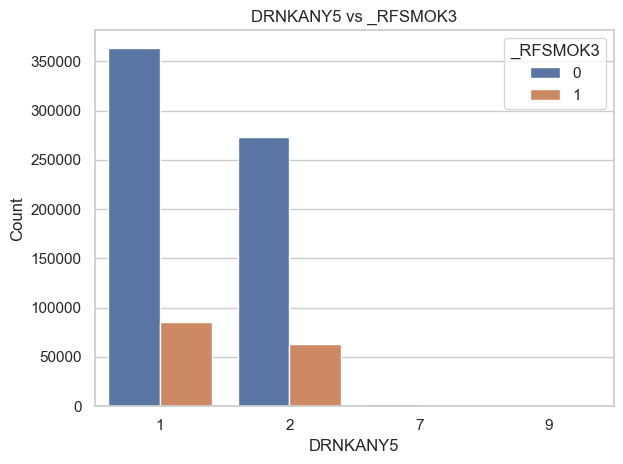

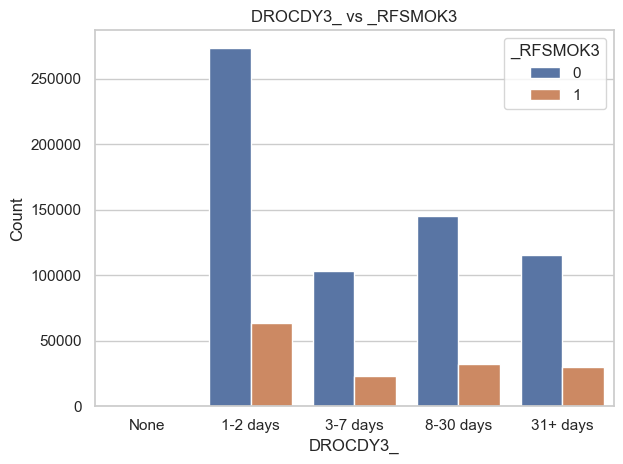

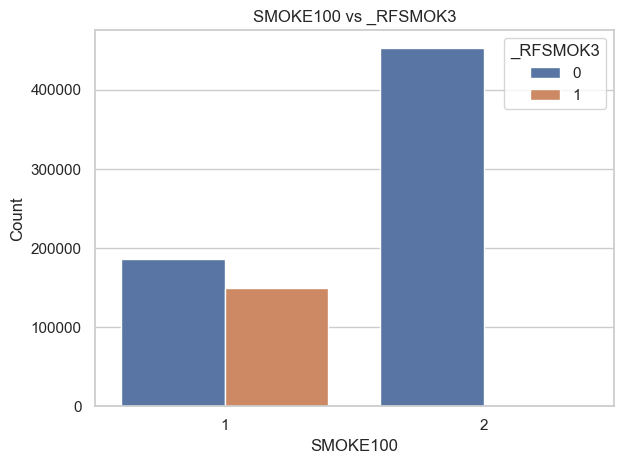

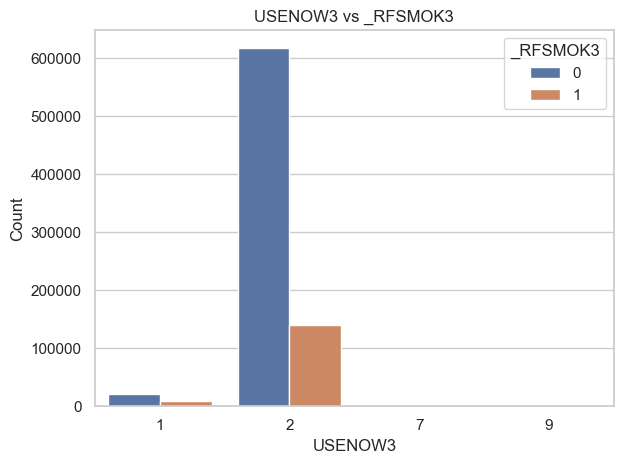

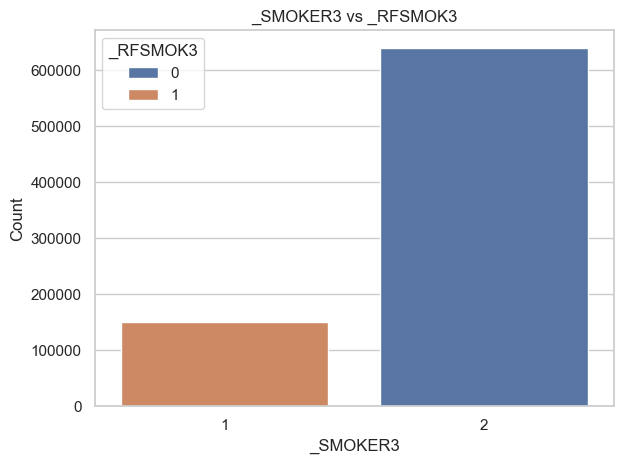

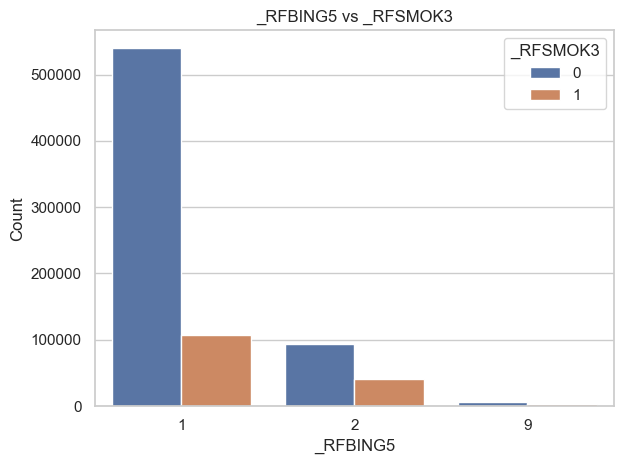

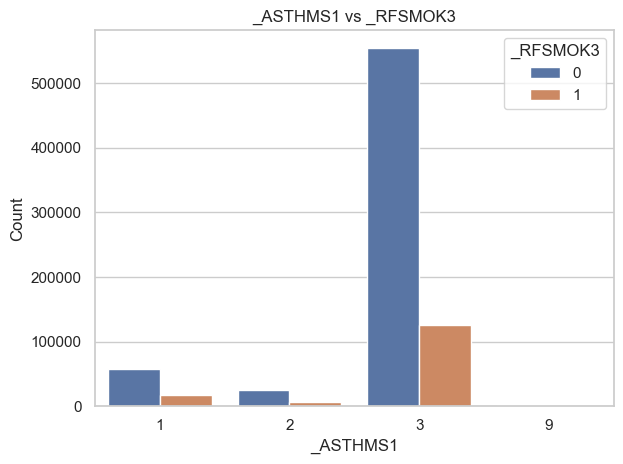

In [557]:

# Visualize relationship between Perceived Susceptibility variables and _RFSMOK3 by calling check_relationship_with_y
for feature in hbm_features['Cues to Action']:  
    check_relationship_with_y(df, feature, '_RFSMOK3')


In [570]:
from itertools import combinations
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V between two categorical variables"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Your feature list
features = hbm_features['Cues to Action']

# Generate all pairs and calculate Cramér's V
results = []

for var1, var2 in combinations(features, 2):
    try:
        cramers_value = cramers_v(df[var1], df[var2])
        results.append({
            'variable1': var1,
            'variable2': var2,
            'cramers_v': cramers_value
        })
        print(f"{var1} vs {var2}: {cramers_value:.4f}")
    except Exception as e:
        print(f"Error with {var1} vs {var2}: {e}")

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nTop correlations:")
print(results_df.sort_values('cramers_v', ascending=False).head(10))

CHECKUP1 vs DRNKANY5: 0.0219
CHECKUP1 vs DROCDY3_: 0.0288
CHECKUP1 vs SMOKE100: 0.0591
CHECKUP1 vs USENOW3: 0.0299
CHECKUP1 vs _SMOKER3: 0.1045
CHECKUP1 vs _RFBING5: 0.0567
CHECKUP1 vs _ASTHMS1: 0.0263
DRNKANY5 vs DROCDY3_: 1.0000
DRNKANY5 vs SMOKE100: 0.0473
DRNKANY5 vs USENOW3: 0.0294
DRNKANY5 vs _SMOKER3: 0.0135
DRNKANY5 vs _RFBING5: 0.5720
DRNKANY5 vs _ASTHMS1: 0.0323
DROCDY3_ vs SMOKE100: 0.0771
DROCDY3_ vs USENOW3: 0.0358
DROCDY3_ vs _SMOKER3: 0.0201
DROCDY3_ vs _RFBING5: 0.3567
DROCDY3_ vs _ASTHMS1: 0.0351
SMOKE100 vs USENOW3: 0.0573
SMOKE100 vs _SMOKER3: 0.5613
SMOKE100 vs _RFBING5: 0.1327
SMOKE100 vs _ASTHMS1: 0.0379
USENOW3 vs _SMOKER3: 0.0508
USENOW3 vs _RFBING5: 0.0724
USENOW3 vs _ASTHMS1: 0.0069
_SMOKER3 vs _RFBING5: 0.1321
_SMOKER3 vs _ASTHMS1: 0.0395
_RFBING5 vs _ASTHMS1: 0.0228

Top correlations:
   variable1 variable2  cramers_v
7   DRNKANY5  DROCDY3_   0.999999
11  DRNKANY5  _RFBING5   0.572043
19  SMOKE100  _SMOKER3   0.561328
16  DROCDY3_  _RFBING5   0.356654
20  SM

From a quick look we can say DRNKANY5 has a high correlation with DROCDY3_ and _RFBING5, so lets drop it, from our hba_features['Cues to Action']

In [578]:

#print(hbm_features['Cues to Action'])
features = hbm_features['Cues to Action']
print(features)
# hbm_features['Cues to Action'].remove('DRNKANY5')
# print(hbm_features['Cues to Action'])
# hbm_features['Cues to Action'].remove('SMOKE100')
# print(hbm_features['Cues to Action'])
hbm_features['Cues to Action'].remove('_SMOKER3')
hbm_features['Cues to Action'].remove('_RFBING5')
print(hbm_features['Cues to Action'])

['CHECKUP1', 'DROCDY3_', 'USENOW3', '_SMOKER3', '_RFBING5', '_ASTHMS1']
['CHECKUP1', 'DROCDY3_', 'USENOW3', '_ASTHMS1']


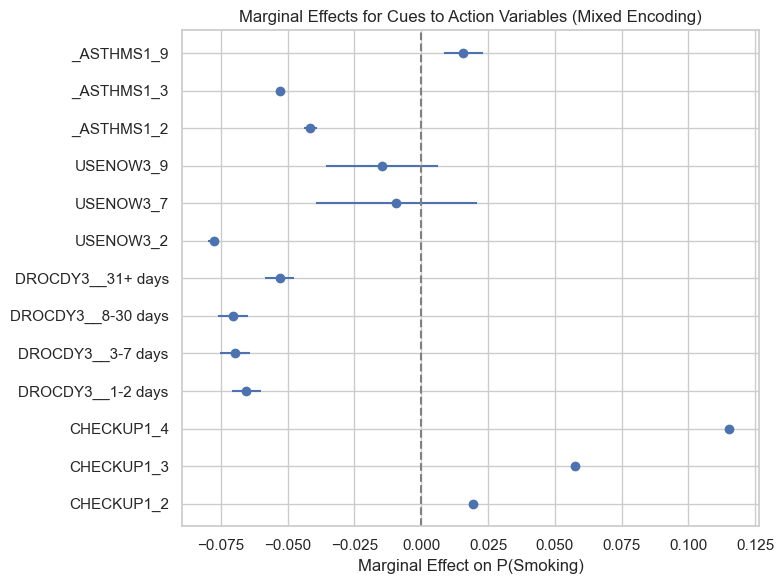

In [579]:
plot_marginal_effects_by_construct_mixed(df, 'Cues to Action', '_RFSMOK3')

Key finding: All DROCDY3_ drinking frequency categories show virtually no effect on smoking (all clustered around 0), including your originally skewed variable. This suggests that after proper handling (categorization), drinking frequency doesn't significantly predict smoking behavior in this model.
Other variables also show minimal effects, clustering around zero.

#### 6. Evaluate SELF-EFFICIENCY features

In [580]:
# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Self-Efficacy']:
    check_class_imbalance(df, feature)   


WEIGHT2 not found or not categorical.
HEIGHT3 not found or not categorical.

_RFBMI5 value counts:
_RFBMI5
2    526941
1    262368
9         0
Name: count, dtype: int64
Most common category proportion: 0.6675978609137866
-> Balanced

_TOTINDA value counts:
_TOTINDA
1    614742
2    174567
9         0
Name: count, dtype: int64
Most common category proportion: 0.778835665119744
-> Balanced

_RFSEAT3 value counts:
_RFSEAT3
1    672107
2    116886
9       316
Name: count, dtype: int64
Most common category proportion: 0.8515131589782962
-> Imbalanced (dominant category > 80%)


In [581]:

#find proportion of rows where values for hbm_features['Perceived Susceptibility'] are 7 and 9
for feature in hbm_features['Self-Efficacy']:
    if feature in df.columns:
        proportion_7 = df[df[feature] == 7].shape[0] / df.shape[0]
        proportion_9 = df[df[feature] == 9].shape[0] / df.shape[0]
        combined_proportion = proportion_7 + proportion_9
        if proportion_7 < 0.05 and proportion_9 < 0.05:
            print(f"\n{feature} has low combined proportion of 7 and 9 values: {combined_proportion:.4f}")
    else:
        print(f"{feature} not found in dataframe.")



WEIGHT2 has low combined proportion of 7 and 9 values: 0.0004

HEIGHT3 has low combined proportion of 7 and 9 values: 0.0000

_RFBMI5 has low combined proportion of 7 and 9 values: 0.0000

_TOTINDA has low combined proportion of 7 and 9 values: 0.0000

_RFSEAT3 has low combined proportion of 7 and 9 values: 0.0004


In [582]:

#lets drop the rows where values for hbm_features['Perceived Severity'] are 7 and 9
# also drop these categories for these features
for feature in hbm_features['Self-Efficacy']:
    if feature in df.columns and df[feature].dtype.name == 'category':
        df = df[(df[feature] != 7) & (df[feature] != 9)]
        df[feature] = df[feature].cat.remove_unused_categories()
    else:
        print(f"{feature} not found in dataframe.")


WEIGHT2 not found in dataframe.
HEIGHT3 not found in dataframe.


In [583]:
# Check class imbalance for each categorical HBM feature in the dataset
for feature in hbm_features['Self-Efficacy']:
    check_class_imbalance(df, feature)   


WEIGHT2 not found or not categorical.
HEIGHT3 not found or not categorical.

_RFBMI5 value counts:
_RFBMI5
2    526692
1    262301
Name: count, dtype: int64
Most common category proportion: 0.6675496487294564
-> Balanced

_TOTINDA value counts:
_TOTINDA
1    614532
2    174461
Name: count, dtype: int64
Most common category proportion: 0.7788814349430223
-> Balanced

_RFSEAT3 value counts:
_RFSEAT3
1    672107
2    116886
Name: count, dtype: int64
Most common category proportion: 0.8518541989599401
-> Imbalanced (dominant category > 80%)


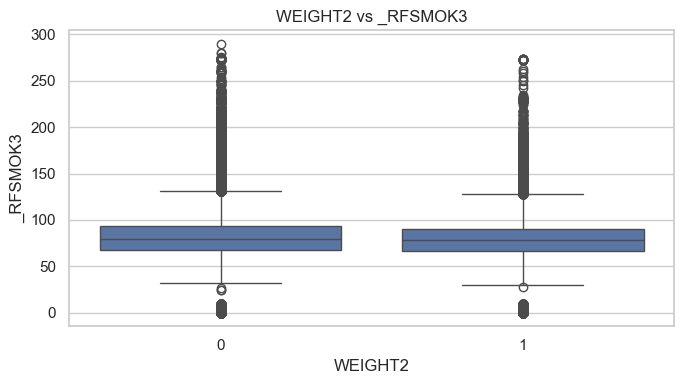

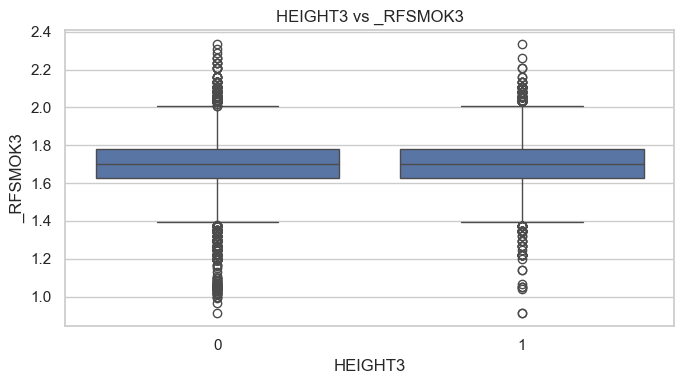

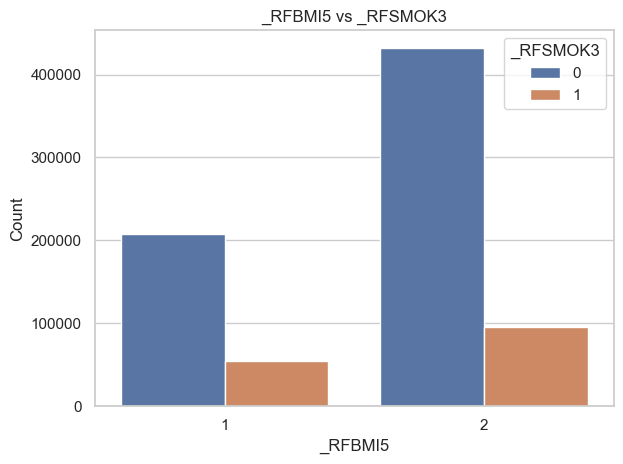

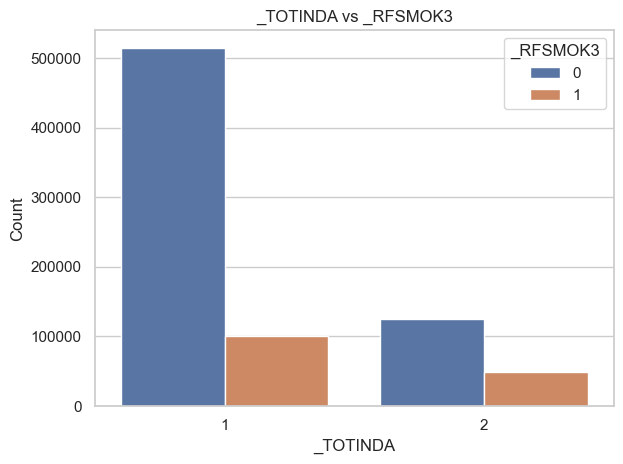

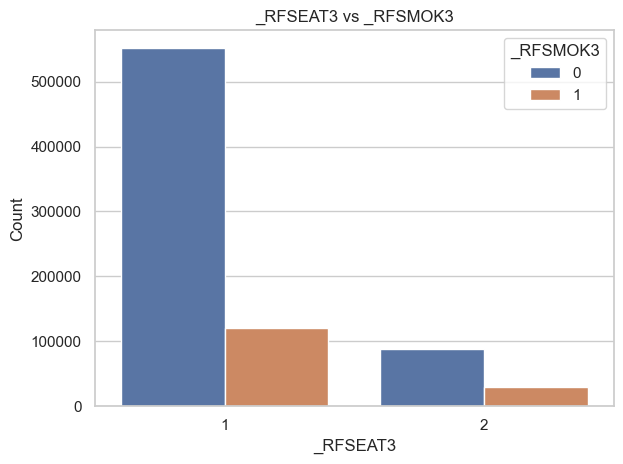

In [584]:

# Visualize relationship between Perceived Susceptibility variables and _RFSMOK3 by calling check_relationship_with_y
for feature in hbm_features['Self-Efficacy']:  
    check_relationship_with_y(df, feature, '_RFSMOK3')


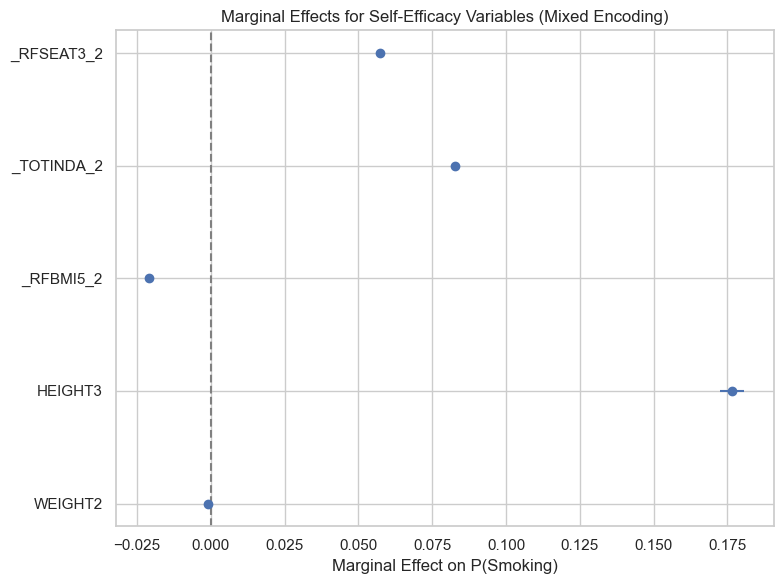

In [ ]:

plot_marginal_effects_by_construct_mixed(df, 'Self-Efficacy', '_RFSMOK3')

HEIGHT3: Strong positive effect (~0.17) - taller individuals more likely to smoke
WEIGHT2: Negative effect (~-0.02) - higher weight associated with lower smoking probability
_RFBMI5_2: Negative effect (~-0.02) - certain BMI categories reduce smoking likelihood

In [585]:
from ydata_profiling import ProfileReport

# Flatten hbm_features to get all relevant columns present in df
hbm_flat = [item for sublist in hbm_features.values() for item in sublist if item in df.columns]
print(hbm_flat)
# Create a profile report for the HBM features
profile = ProfileReport(df[hbm_flat], title="HBM Features Profiling Report", minimal=True)
#profile.to_notebook_iframe()


['CHCKIDNY', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'DIABETE3', 'ADDEPEV2', 'MENTHLTH', 'PHYSHLTH', 'GENHLTH', '_RFHLTH', 'QLACTLM2', 'MENTHLTH', 'PHYSHLTH', 'USEEQUIP', 'CHECKUP1', 'HLTHPLN1', 'PERSDOC2', 'EXERANY2', 'PNEUVAC3', 'HIVTST6', '_HCVU651', 'MEDCOST', 'RENTHOM1', '_INCOMG', '_EDUCAG', 'VETERAN3', 'SEX', 'CHECKUP1', 'DROCDY3_', 'USENOW3', '_ASTHMS1', 'WEIGHT2', 'HEIGHT3', '_RFBMI5', '_TOTINDA', '_RFSEAT3']


In [586]:
profile.to_file("../reports/01-eda-final-hbm_features_profiling_report.html")

/opt/anaconda3/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 41/41 [00:01<00:00, 32.81it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [597]:
profile

Lets see if MENTHLTH and PHYSHLTH can be binned to deal with large number of zeros and check if the effect will change the marginal effect

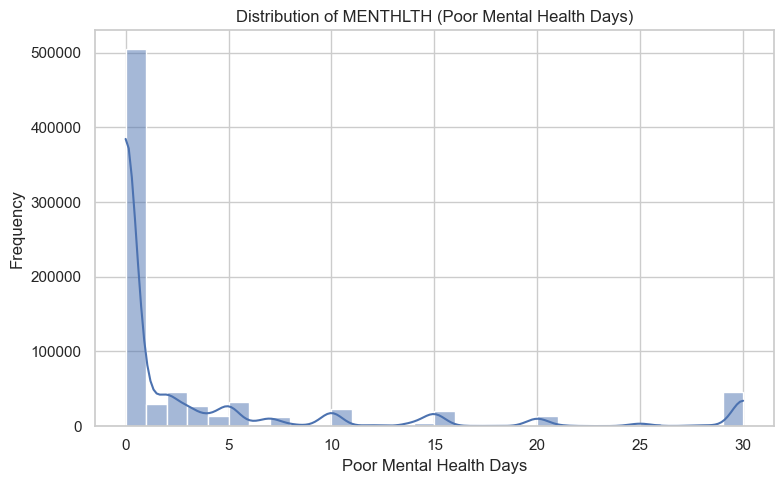

In [588]:
#visuatlize distribution of MENTHLTH
if 'MENTHLTH' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['MENTHLTH'], bins=30, kde=True)
    plt.title('Distribution of MENTHLTH (Poor Mental Health Days)')
    plt.xlabel('Poor Mental Health Days')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("MENTHLTH column not found in dataframe.")


In [593]:
# bin mental health days into groups of 0 : 0 days, 1-7 : approx. week, 8-16: approx 2 weeks, 16+: More than 2 weeks
import numpy as np 
if 'MENTHLTH' in df.columns:
    df['MENTHLTH_TEMP_2'] = pd.cut(df['MENTHLTH'], bins=[-1, 0, 7, 15, np.inf], 
                               labels=['0 days', '1-7 days', '8-15 days', '16+ days'])
    print("Updated MENTHLTH value counts:")
    print(df['MENTHLTH_TEMP_2'].value_counts())
if 'MENTHLTH' in df.columns:
    # Drop the original MENTHLTH column and rename the temporary one
    df.drop(columns=['MENTHLTH'], inplace=True)
    df.rename(columns={'MENTHLTH_TEMP_2': 'MENTHLTH'}, inplace=True)
   




Updated MENTHLTH value counts:
MENTHLTH_TEMP_2
0 days       504623
1-7 days     163920
16+ days      67322
8-15 days     53128
Name: count, dtype: int64


In [594]:
#Find proportion of MENTALHLTH_TEMP_2 bins 
if 'MENTHLTH' in df.columns:
    proportion_0 = df[df['MENTHLTH'] == '0 days'].shape[0] / df.shape[0]
    proportion_1_7 = df[df['MENTHLTH'] == '1-7 days'].shape[0] / df.shape[0]
    proportion_8_15 = df[df['MENTHLTH'] == '8-15 days'].shape[0] / df.shape[0]
    proportion_16_plus = df[df['MENTHLTH'] == '16+ days'].shape[0] / df.shape[0]

    print(f"Proportion of 0 days: {proportion_0:.4f}")
    print(f"Proportion of 1-7 days: {proportion_1_7:.4f}")
    print(f"Proportion of 8-15 days: {proportion_8_15:.4f}")
    print(f"Proportion of 16+ days: {proportion_16_plus:.4f}")
else:
    print("MENTHLTH column not found in dataframe.")

Proportion of 0 days: 0.6396
Proportion of 1-7 days: 0.2078
Proportion of 8-15 days: 0.0673
Proportion of 16+ days: 0.0853


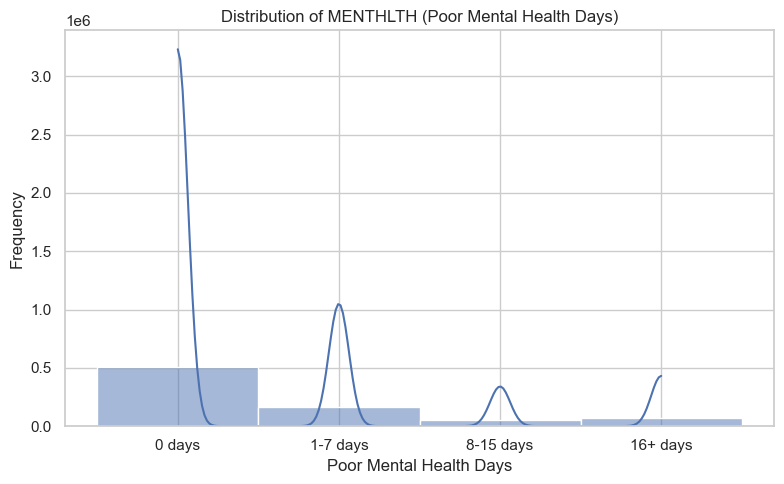

In [ ]:
#visuatlize distribution of MENTHLTH again
if 'MENTHLTH' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['MENTHLTH'], bins=30, kde=True)
    plt.title('Distribution of MENTHLTH (Poor Mental Health Days)')
    plt.xlabel('Poor Mental Health Days')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("MENTHLTH column not found in dataframe.")


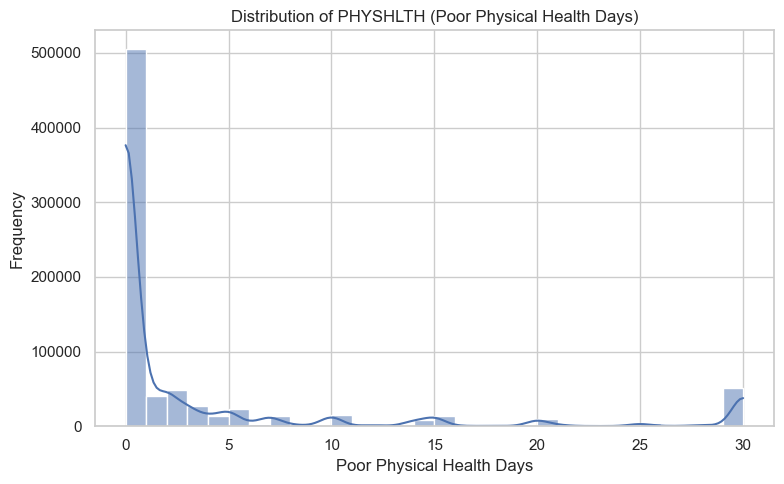

In [596]:
#Lets do the same for PHYSHLTH
# visuatlize distribution of PHYSHLTH
if 'PHYSHLTH' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['PHYSHLTH'], bins=30, kde=True)
    plt.title('Distribution of PHYSHLTH (Poor Physical Health Days)')
    plt.xlabel('Poor Physical Health Days')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("PHYSHLTH column not found in dataframe.")    

In [598]:
# bin PHYSHLTH health days into groups of 0 : 0 days, 1-7 : approx. week, 8-16: approx 2 weeks, 16+: More than 2 weeks
import numpy as np 
if 'PHYSHLTH' in df.columns:
    df['PHYSHLTH_TEMP_2'] = pd.cut(df['PHYSHLTH'], bins=[-1, 0, 7, 15, np.inf], 
                               labels=['0 days', '1-7 days', '8-15 days', '16+ days'])
    print("Updated PHYSHLTH value counts:")
    print(df['PHYSHLTH_TEMP_2'].value_counts())
if 'PHYSHLTH' in df.columns:
    # Drop the original MENTHLTH column and rename the temporary one
    df.drop(columns=['PHYSHLTH'], inplace=True)
    df.rename(columns={'PHYSHLTH_TEMP_2': 'PHYSHLTH'}, inplace=True)

Updated PHYSHLTH value counts:
PHYSHLTH_TEMP_2
0 days       504842
1-7 days     171041
16+ days      70967
8-15 days     42143
Name: count, dtype: int64


In [599]:
#Find proportion of MENTALHLTH_TEMP_2 bins 
if 'PHYSHLTH' in df.columns:
    proportion_0 = df[df['PHYSHLTH'] == '0 days'].shape[0] / df.shape[0]
    proportion_1_7 = df[df['PHYSHLTH'] == '1-7 days'].shape[0] / df.shape[0]
    proportion_8_15 = df[df['PHYSHLTH'] == '8-15 days'].shape[0] / df.shape[0]
    proportion_16_plus = df[df['PHYSHLTH'] == '16+ days'].shape[0] / df.shape[0]

    print(f"Proportion of 0 days: {proportion_0:.4f}")
    print(f"Proportion of 1-7 days: {proportion_1_7:.4f}")
    print(f"Proportion of 8-15 days: {proportion_8_15:.4f}")
    print(f"Proportion of 16+ days: {proportion_16_plus:.4f}")
else:
    print("PHYSHLTH column not found in dataframe.")

Proportion of 0 days: 0.6399
Proportion of 1-7 days: 0.2168
Proportion of 8-15 days: 0.0534
Proportion of 16+ days: 0.0899


Every bin is significant and no need to merge them further since proportion >=0.05 for all bins

In [600]:
#Lets try profiling the variables once more to check if some of the issues are resolved
from ydata_profiling import ProfileReport

# Flatten hbm_features to get all relevant columns present in df
hbm_flat = [item for sublist in hbm_features.values() for item in sublist if item in df.columns]
print(hbm_flat)
# Create a profile report for the HBM features
profile = ProfileReport(df[hbm_flat], title="HBM Features Profiling Report-2", minimal=True)
#profile.to_notebook_iframe()
profile.to_file("../reports/02-eda-final-hbm_features_profiling_report-2.html")

['CHCKIDNY', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'DIABETE3', 'ADDEPEV2', 'MENTHLTH', 'PHYSHLTH', 'GENHLTH', '_RFHLTH', 'QLACTLM2', 'MENTHLTH', 'PHYSHLTH', 'USEEQUIP', 'CHECKUP1', 'HLTHPLN1', 'PERSDOC2', 'EXERANY2', 'PNEUVAC3', 'HIVTST6', '_HCVU651', 'MEDCOST', 'RENTHOM1', '_INCOMG', '_EDUCAG', 'VETERAN3', 'SEX', 'CHECKUP1', 'DROCDY3_', 'USENOW3', '_ASTHMS1', 'WEIGHT2', 'HEIGHT3', '_RFBMI5', '_TOTINDA', '_RFSEAT3']


/opt/anaconda3/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 41/41 [00:00<00:00, 50.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [601]:
profile